<a href="https://colab.research.google.com/github/ShrutiPatel263/AeroCare/blob/main/1st_Notebook_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['s_{}'.format(i+1) for i in range(0,21)]
col_names = index_names + setting_names + sensor_names

In [ ]:
dftrain = pd.read_csv('drive/MyDrive/archive/CMaps/train_FD003.txt',sep=r'\s+',header=None,index_col=False,names=col_names)
dfvalid = pd.read_csv('drive/MyDrive/archive/CMaps/test_FD003.txt',sep=r'\s+',header=None,index_col=False,names=col_names)
y_valid = pd.read_csv('drive/MyDrive/archive/CMaps/RUL_FD003.txt',sep=r'\s+',header=None,index_col=False,names=['RUL'])

In [ ]:
dfvalid.shape

(16596, 26)

In [ ]:
dftrain.shape

(24720, 26)

In [ ]:
train=dftrain.copy()
valid=dfvalid.copy()

In [ ]:
print('Shape of the train dataset : ',train.shape)
print('Shape of the validation dataset : ',valid.shape)
print('Percentage of the validation dataset : ',len(valid)/(len(valid)+len(train)))

Shape of the train dataset :  (24720, 26)
Shape of the validation dataset :  (16596, 26)
Percentage of the validation dataset :  0.4016845774034272


In [ ]:
train.head()

,unit_number,time_cycles,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0005,0.0004,100.0,518.67,642.36,1583.23,1396.84,14.62,...,522.31,2388.01,8145.32,8.4246,0.03,391,2388,100.0,39.11,23.3537
1,1,2,0.0008,-0.0003,100.0,518.67,642.50,1584.69,1396.89,14.62,...,522.42,2388.03,8152.85,8.4403,0.03,392,2388,100.0,38.99,23.4491
2,1,3,-0.0014,-0.0002,100.0,518.67,642.18,1582.35,1405.61,14.62,...,522.03,2388.00,8150.17,8.3901,0.03,391,2388,100.0,38.85,23.3669
3,1,4,-0.0020,0.0001,100.0,518.67,642.92,1585.61,1392.27,14.62,...,522.49,2388.08,8146.56,8.3878,0.03,392,2388,100.0,38.96,23.2951
4,1,5,0.0016,0.0000,100.0,518.67,641.68,1588.63,1397.65,14.62,...,522.58,2388.03,8147.80,8.3869,0.03,392,2388,100.0,39.14,23.4583


In [ ]:
train.isnull().sum()

,0
unit_number,0
time_cycles,0
setting_1,0
setting_2,0
setting_3,0
s_1,0
s_2,0
s_3,0
s_4,0
s_5,0


In [ ]:
train.loc[:,['unit_number','time_cycles']].describe()

,unit_number,time_cycles
count,24720.000000,24720.000000
mean,48.631877,139.077063
std,29.348985,98.846675
min,1.000000,1.000000
25%,23.000000,62.000000
50%,47.000000,124.000000
75%,74.000000,191.000000
max,100.000000,525.000000


In [ ]:
train.loc[:,'s_1':].describe()

,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
count,2.472000e+04,24720.000000,24720.000000,24720.000000,2.472000e+04,24720.000000,24720.000000,24720.000000,24720.000000,24720.000000,...,24720.000000,24720.000000,24720.000000,24720.000000,2.472000e+04,24720.000000,24720.0,24720.0,24720.000000,24720.000000
mean,5.186700e+02,642.457858,1588.079175,1404.471212,1.462000e+01,21.595841,555.143808,2388.071555,9064.110809,1.301232,...,523.050873,2388.071643,8144.202916,8.396176,3.000000e-02,392.566545,2388.0,100.0,38.988552,23.393024
std,6.684921e-11,0.523031,6.810418,9.773178,3.602525e-12,0.018116,3.437343,0.158285,19.980294,0.003485,...,3.255314,0.158121,16.504118,0.060512,1.750371e-14,1.761459,0.0,0.0,0.248865,0.149234
min,5.186700e+02,640.840000,1564.300000,1377.060000,1.462000e+01,21.450000,549.610000,2386.900000,9017.980000,1.290000,...,517.770000,2386.930000,8099.680000,8.156300,3.000000e-02,388.000000,2388.0,100.0,38.170000,22.872600
25%,5.186700e+02,642.080000,1583.280000,1397.187500,1.462000e+01,21.580000,553.110000,2388.000000,9051.920000,1.300000,...,521.150000,2388.010000,8134.510000,8.360600,3.000000e-02,391.000000,2388.0,100.0,38.830000,23.296200
50%,5.186700e+02,642.400000,1587.520000,1402.910000,1.462000e+01,21.600000,554.050000,2388.070000,9060.010000,1.300000,...,521.980000,2388.070000,8141.200000,8.398300,3.000000e-02,392.000000,2388.0,100.0,38.990000,23.391600
75%,5.186700e+02,642.790000,1592.412500,1410.600000,1.462000e+01,21.610000,556.040000,2388.140000,9070.092500,1.300000,...,523.840000,2388.140000,8149.230000,8.437000,3.000000e-02,394.000000,2388.0,100.0,39.140000,23.483300
max,5.186700e+02,645.110000,1615.390000,1441.160000,1.462000e+01,21.610000,570.490000,2388.600000,9234.350000,1.320000,...,537.400000,2388.610000,8290.550000,8.570500,3.000000e-02,399.000000,2388.0,100.0,39.850000,23.950500


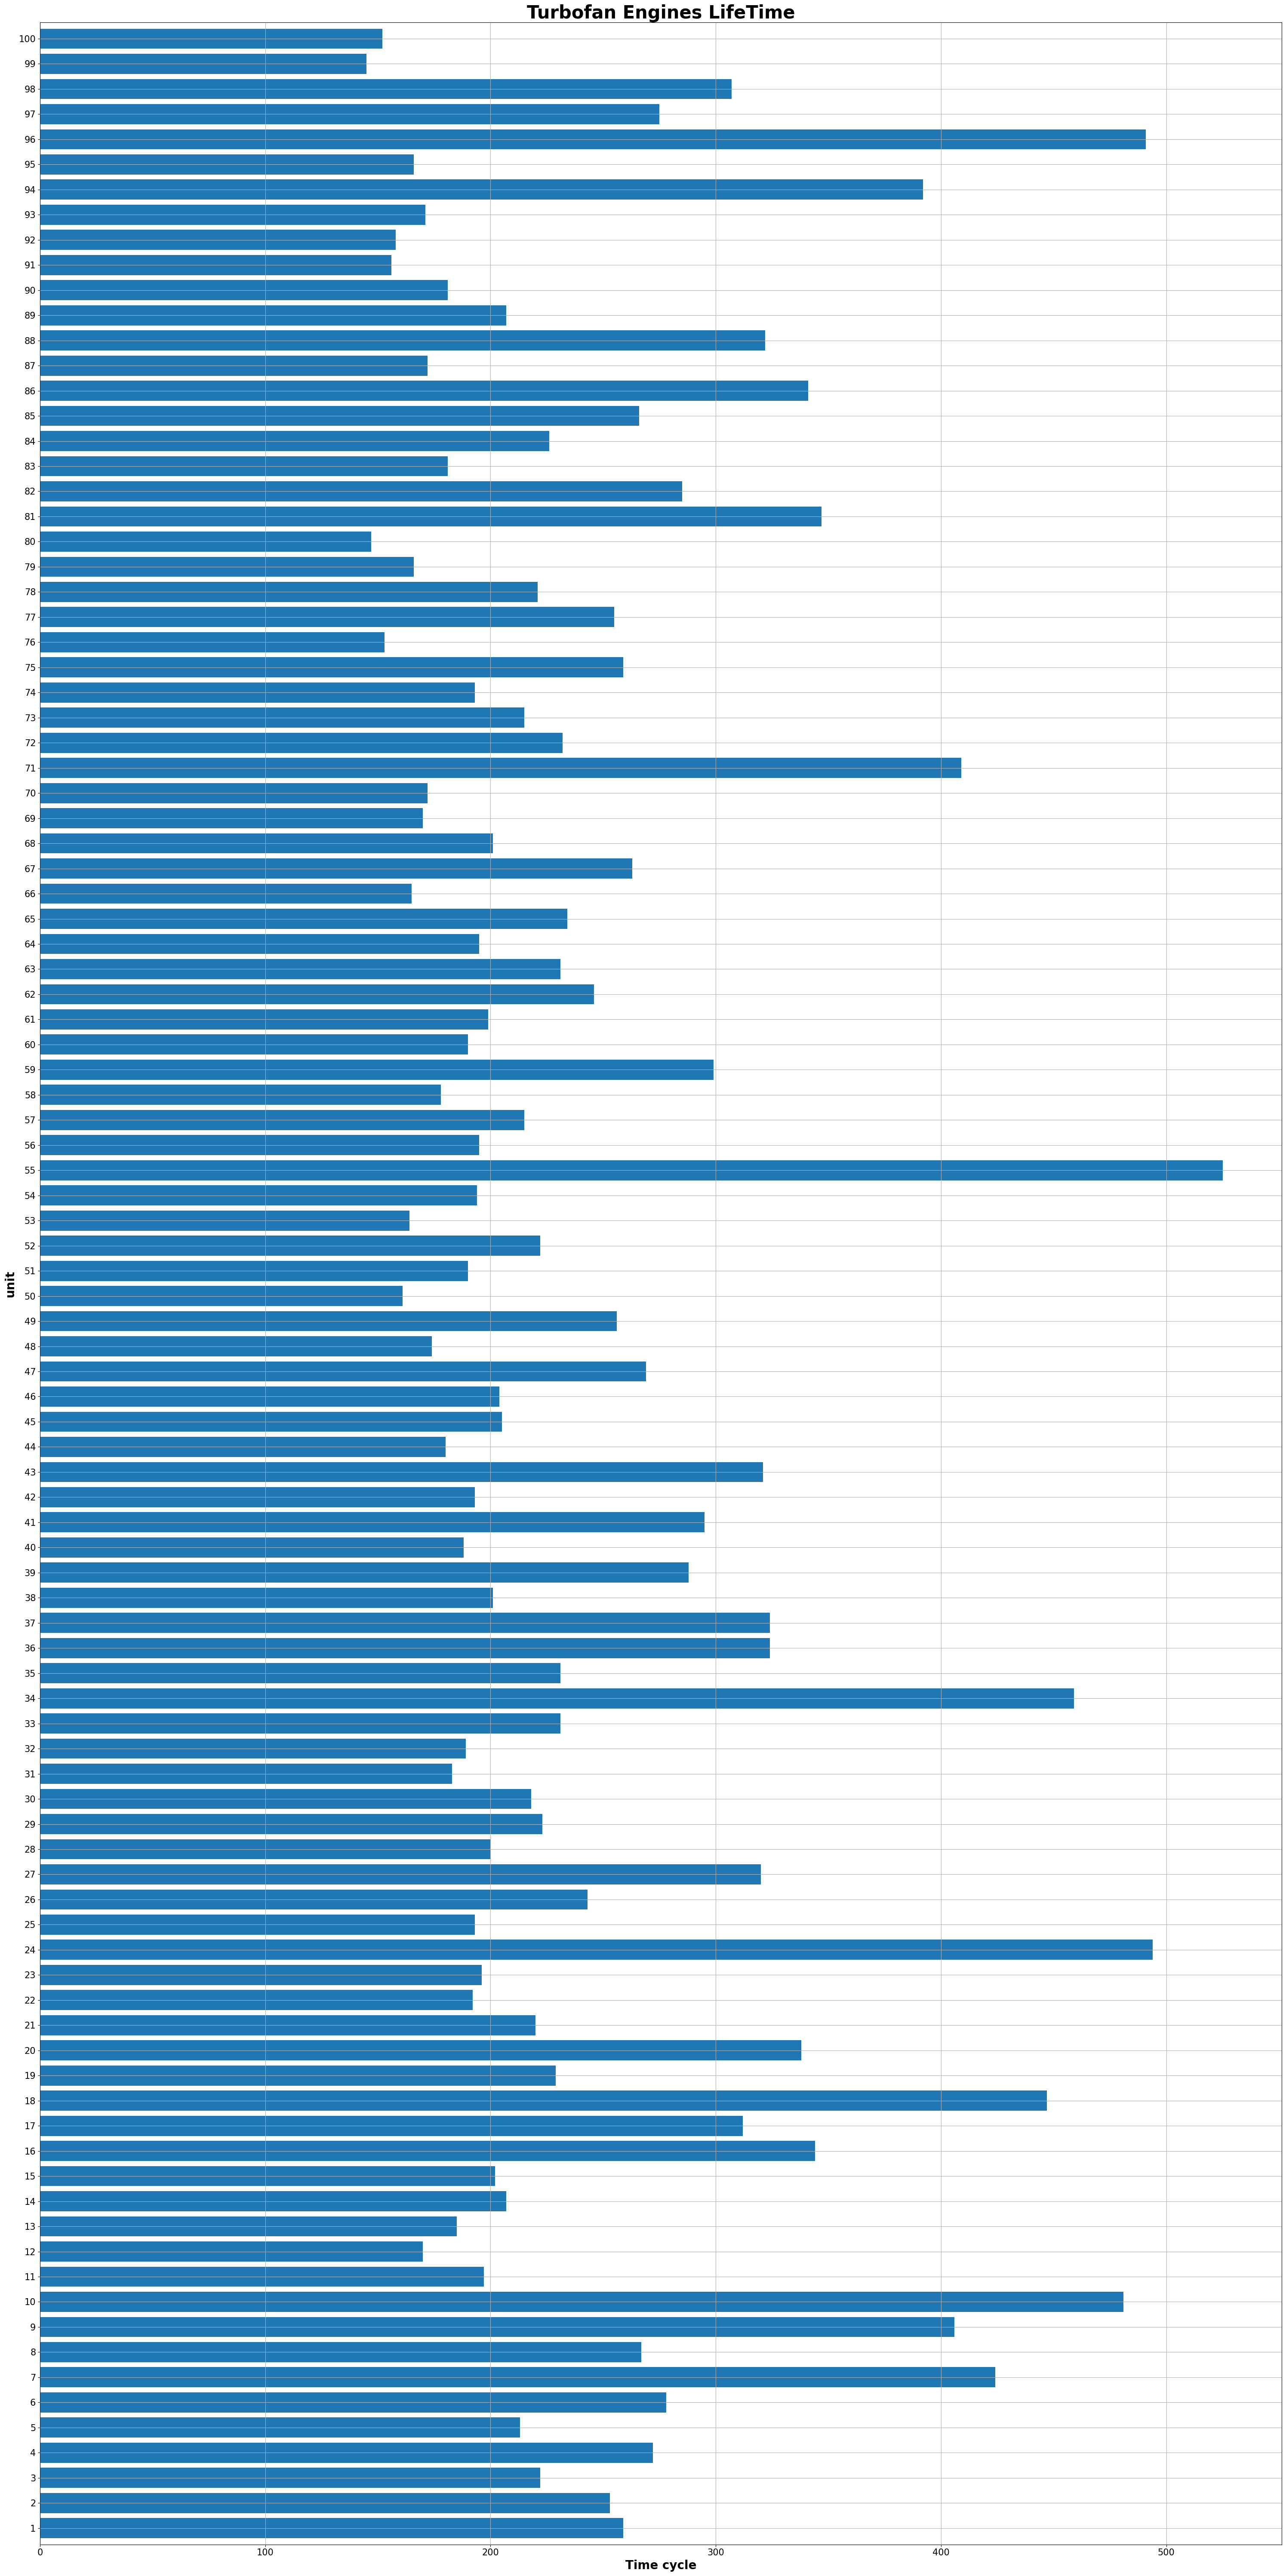

In [ ]:
##Maximum time cycle for each unit

max_time_cycles=train[index_names].groupby('unit_number').max()
plt.figure(figsize=(30,60))
ax=max_time_cycles['time_cycles'].plot(kind='barh',width=0.8, stacked=True,align='center')
plt.title('Turbofan Engines LifeTime',fontweight='bold',size=30)
plt.xlabel('Time cycle',fontweight='bold',size=20)
plt.xticks(size=15)
plt.ylabel('unit',fontweight='bold',size=20)
plt.yticks(size=15)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 9.444444444444459, 'max time cycle')

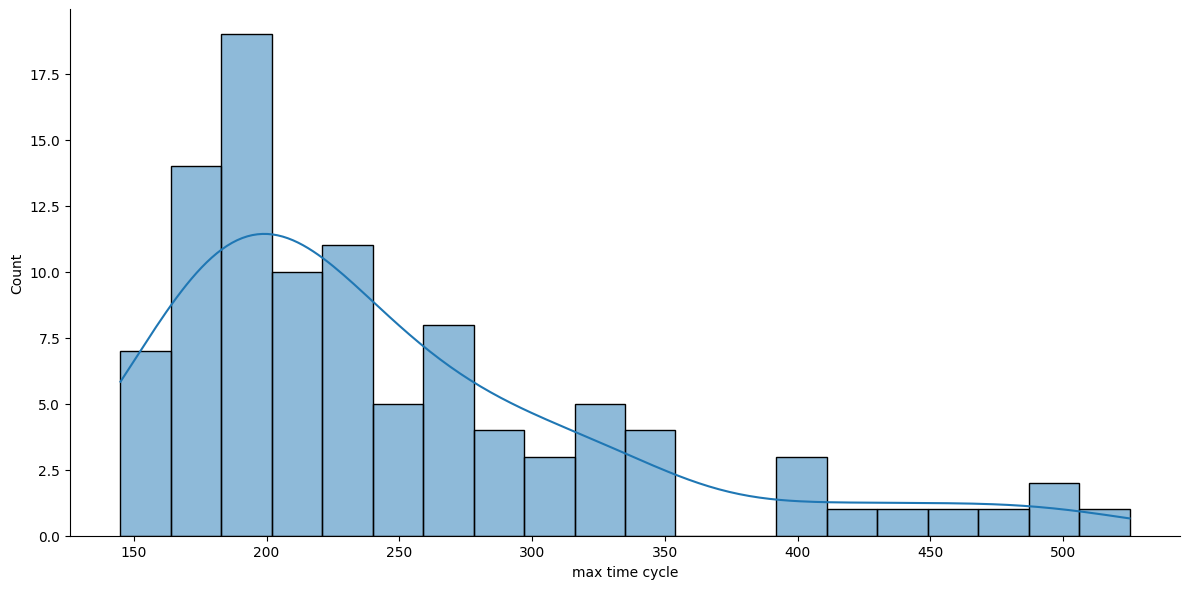

In [ ]:
#Distribution of maximum time cycles
sns.displot(max_time_cycles['time_cycles'],kde=True,bins=20,height=6,aspect=2)
plt.xlabel('max time cycle')

In [ ]:
def add_RUL_column(df):
    train_grouped_by_unit = df.groupby(by='unit_number')
    max_time_cycles = train_grouped_by_unit['time_cycles'].max()
    merged = df.merge(max_time_cycles.to_frame(name='max_time_cycle'), left_on='unit_number',right_index=True)
    merged["RUL"] = merged["max_time_cycle"] - merged['time_cycles']
    merged = merged.drop("max_time_cycle", axis=1)
    return merged

In [ ]:
train = add_RUL_column(train)

In [ ]:
train[['unit_number','RUL']]


,unit_number,RUL
0,1,258
1,1,257
2,1,256
3,1,255
4,1,254
...,...,...
24715,100,4
24716,100,3
24717,100,2
24718,100,1


In [ ]:
train['unit_number'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [ ]:
unit_1=np.where(train['unit_number']==1)

In [ ]:
unit_1

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

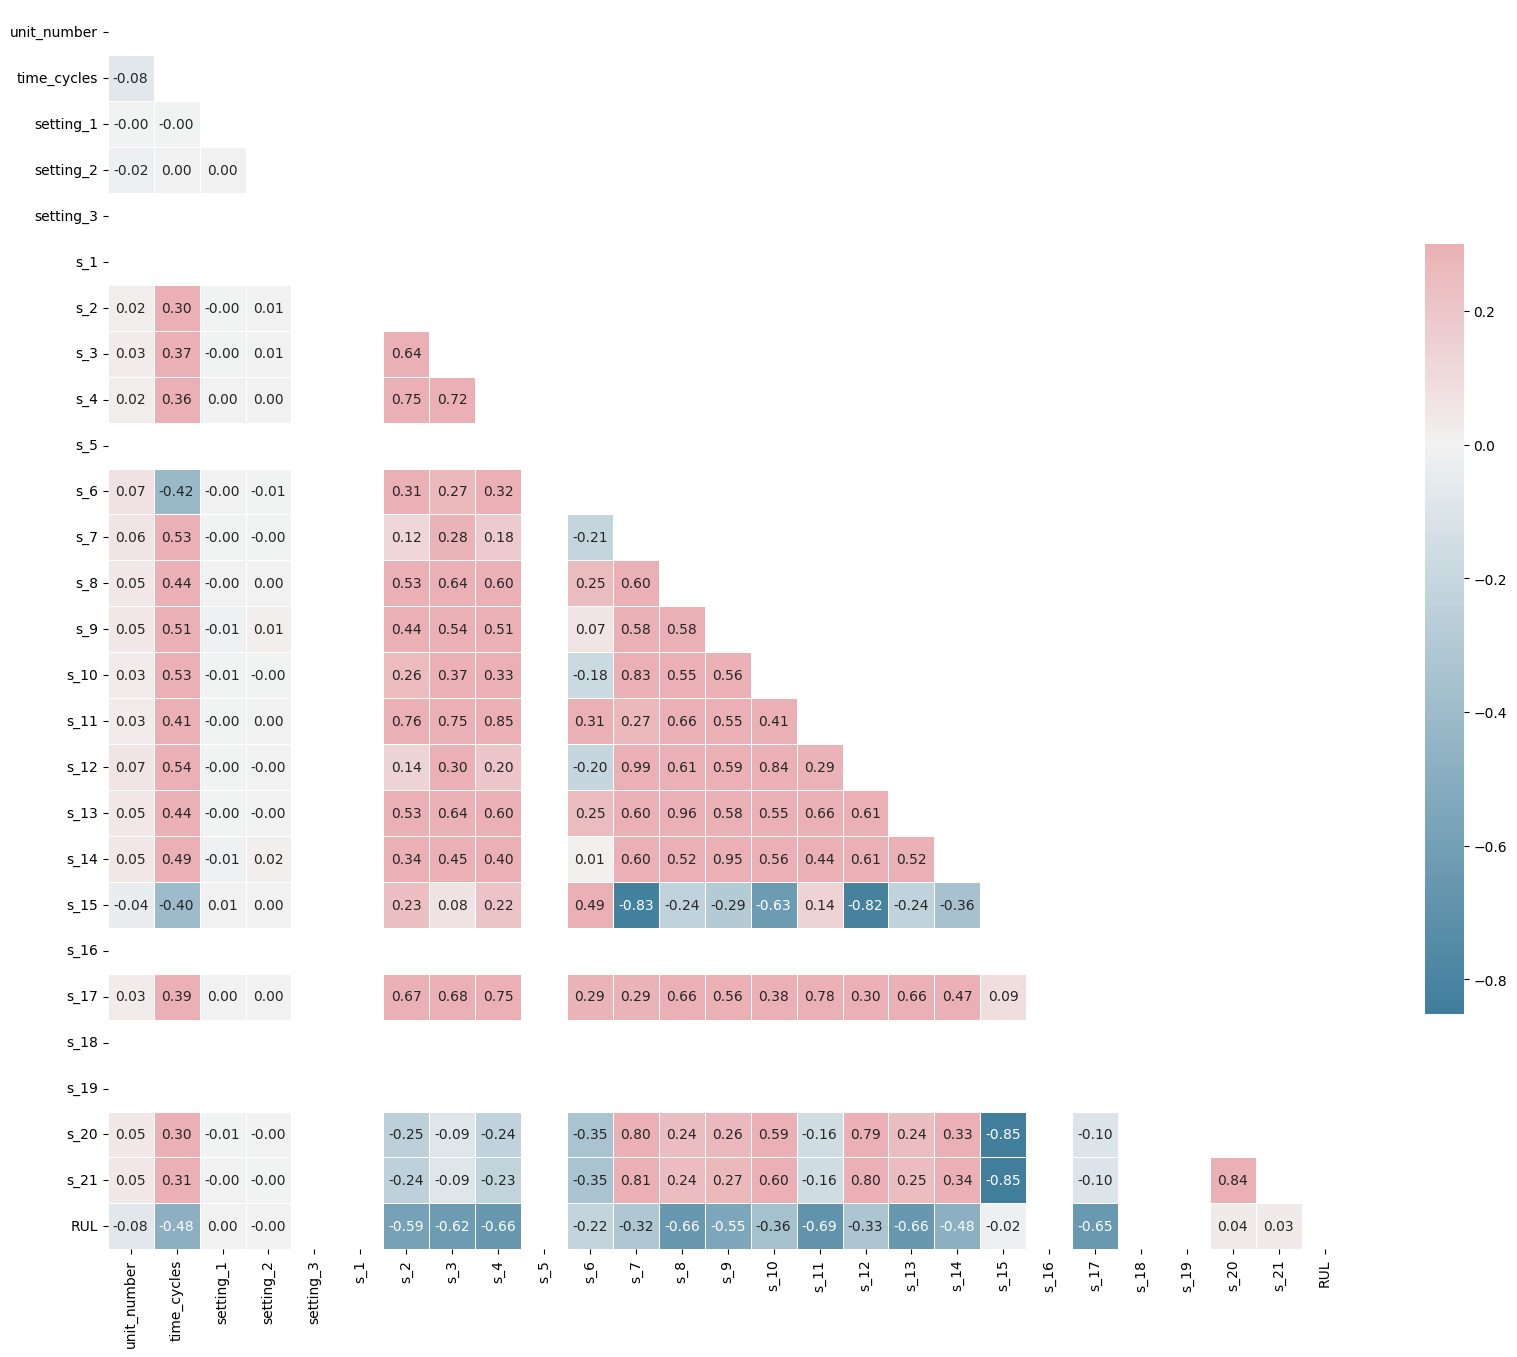

In [ ]:

corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 10, as_cmap=True)

# Draw the heatmap with annotation
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True,           # <- Add this line
    fmt=".2f"             # <- Format the numbers to 2 decimal places
)

plt.show()


We can remove setting 3,1,5,16,18,19

In [ ]:
Sensor_dictionary={}
dict_list=[ "(Fan inlet temperature) (◦R)",
"(LPC outlet temperature) (◦R)",
"(HPC outlet temperature) (◦R)",
"(LPT outlet temperature) (◦R)",
"(Fan inlet Pressure) (psia)",
"(bypass-duct pressure) (psia)",
"(HPC outlet pressure) (psia)",
"(Physical fan speed) (rpm)",
"(Physical core speed) (rpm)",
"(Engine pressure ratio(P50/P2)",
"(HPC outlet Static pressure) (psia)",
"(Ratio of fuel flow to Ps30) (pps/psia)",
"(Corrected fan speed) (rpm)",
"(Corrected core speed) (rpm)",
"(Bypass Ratio) ",
"(Burner fuel-air ratio)",
"(Bleed Enthalpy)",
"(Required fan speed)",
"(Required fan conversion speed)",
"(High-pressure turbines Cool air flow)",
"(Low-pressure turbines Cool air flow)" ]
i=1
for x in dict_list :
    Sensor_dictionary['s_'+str(i)]=x
    i+=1
Sensor_dictionary

{'s_1': '(Fan inlet temperature) (◦R)',
 's_2': '(LPC outlet temperature) (◦R)',
 's_3': '(HPC outlet temperature) (◦R)',
 's_4': '(LPT outlet temperature) (◦R)',
 's_5': '(Fan inlet Pressure) (psia)',
 's_6': '(bypass-duct pressure) (psia)',
 's_7': '(HPC outlet pressure) (psia)',
 's_8': '(Physical fan speed) (rpm)',
 's_9': '(Physical core speed) (rpm)',
 's_10': '(Engine pressure ratio(P50/P2)',
 's_11': '(HPC outlet Static pressure) (psia)',
 's_12': '(Ratio of fuel flow to Ps30) (pps/psia)',
 's_13': '(Corrected fan speed) (rpm)',
 's_14': '(Corrected core speed) (rpm)',
 's_15': '(Bypass Ratio) ',
 's_16': '(Burner fuel-air ratio)',
 's_17': '(Bleed Enthalpy)',
 's_18': '(Required fan speed)',
 's_19': '(Required fan conversion speed)',
 's_20': '(High-pressure turbines Cool air flow)',
 's_21': '(Low-pressure turbines Cool air flow)'}

In [ ]:
def plot_signal(df, Sensor_dic, signal_name):
    plt.figure(figsize=(13,5))
    for i in df['unit_number'].unique():
        if (i % 10 == 0):   #For a better visualisation, we plot the sensors signals of 20 units only
            plt.plot('RUL', signal_name, data=df[df['unit_number']==i].rolling(10).mean())

    plt.xlim(250, 0)  # reverse the x-axis so RUL counts down to zero
    plt.xticks(np.arange(0, 300, 25))
    plt.ylabel(Sensor_dic[signal_name])
    plt.xlabel('Remaining Useful Life')
    plt.show()

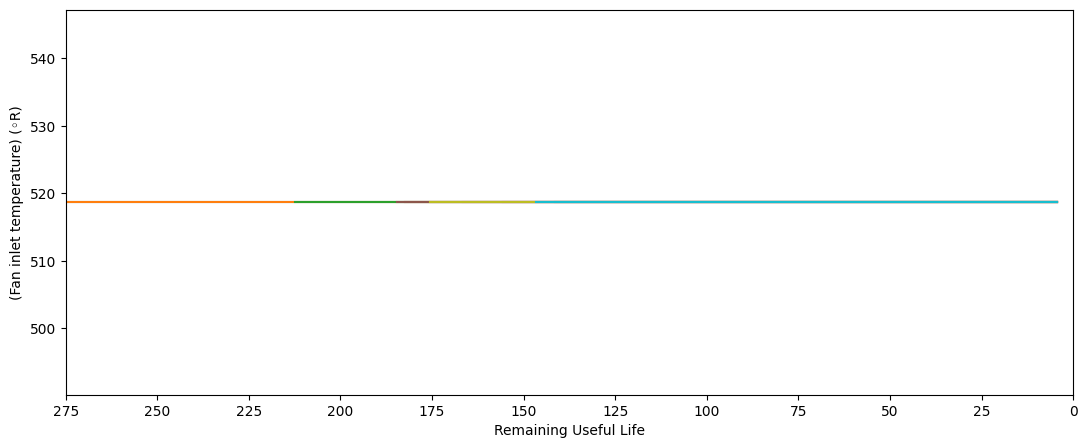

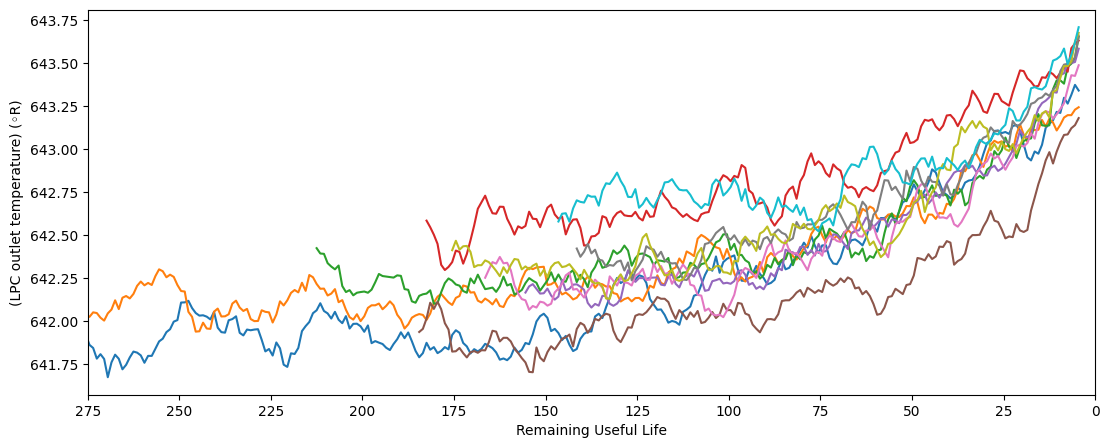

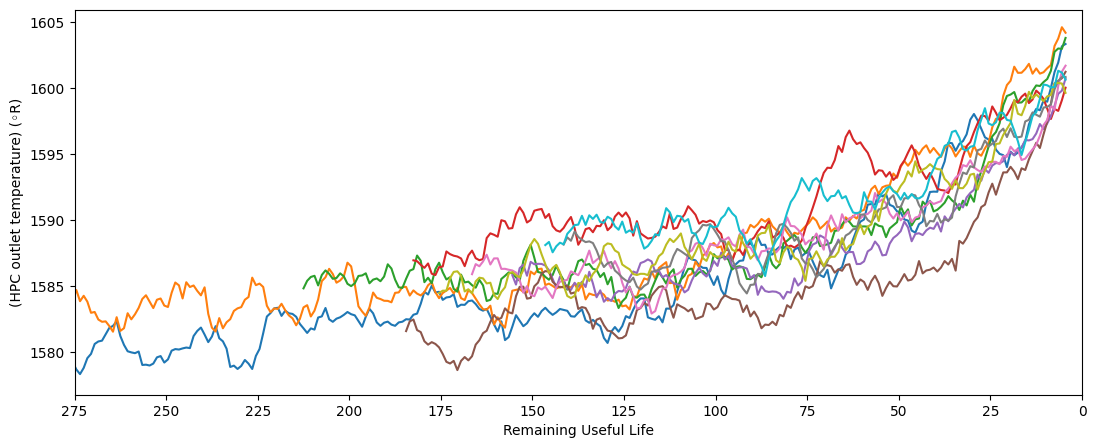

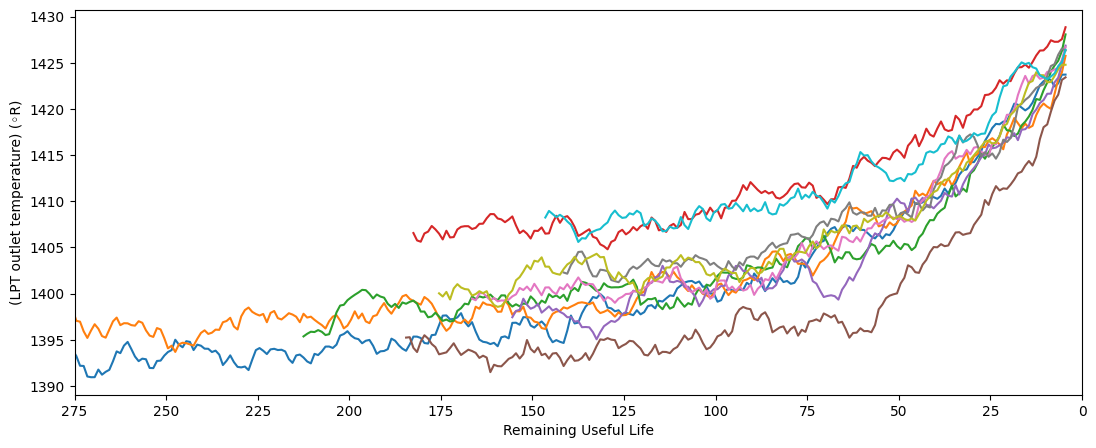

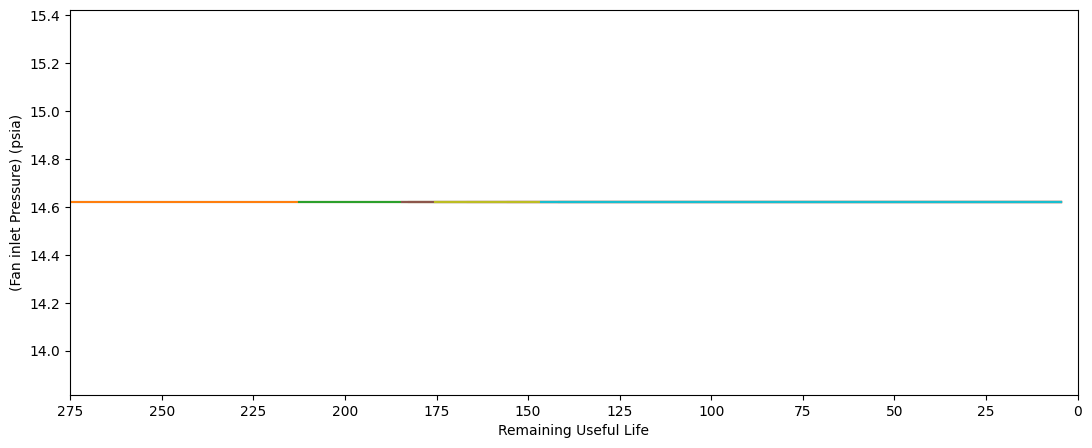

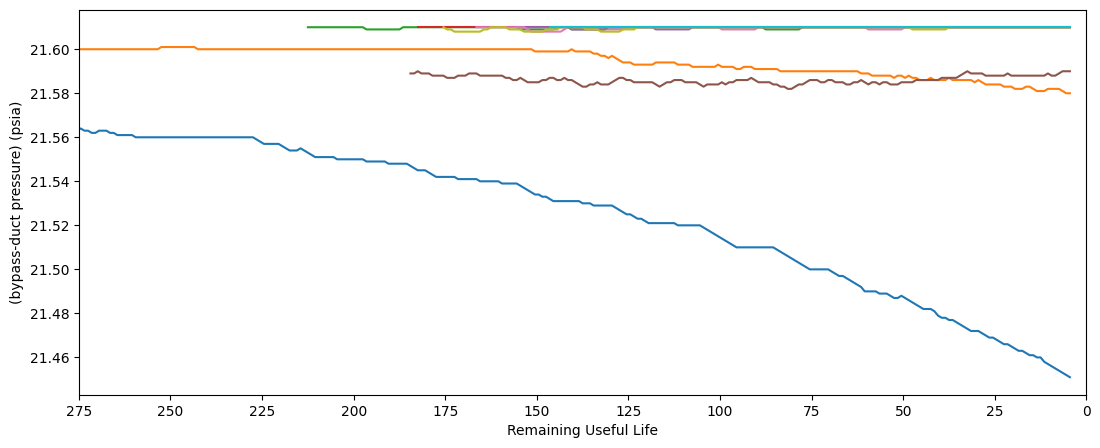

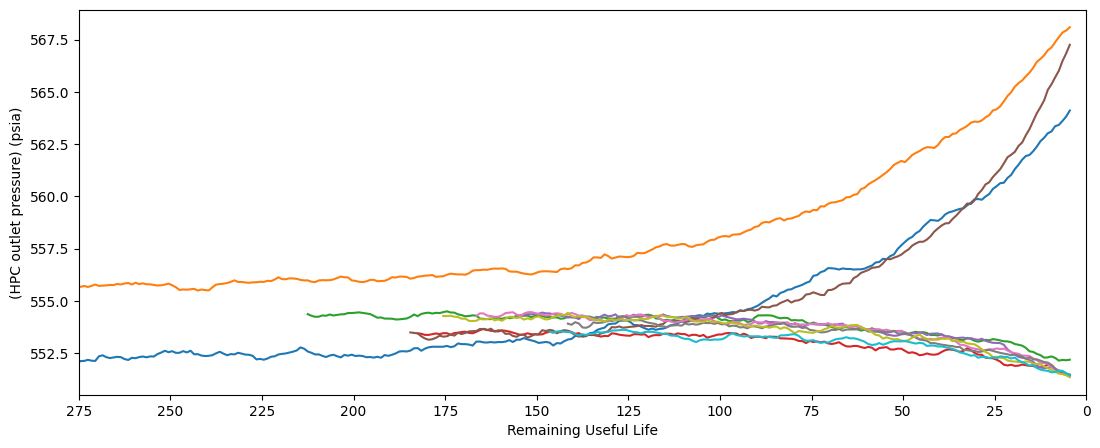

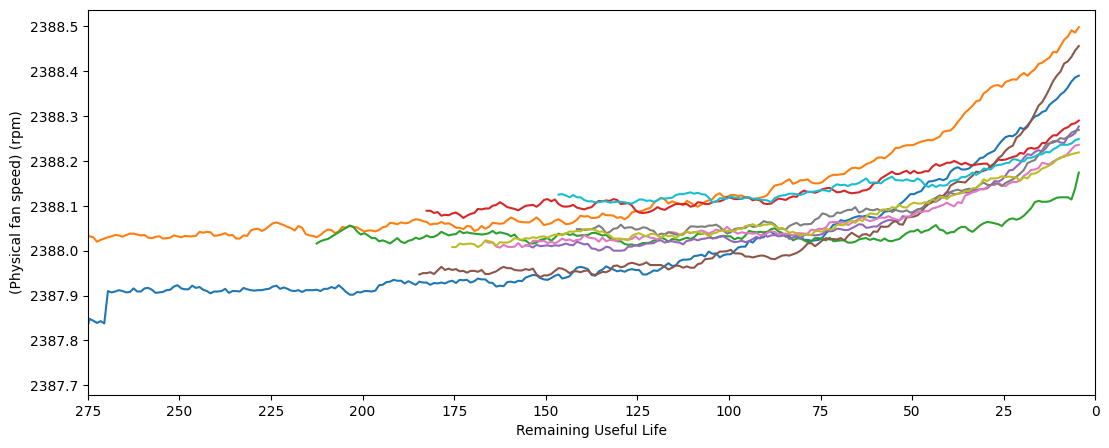

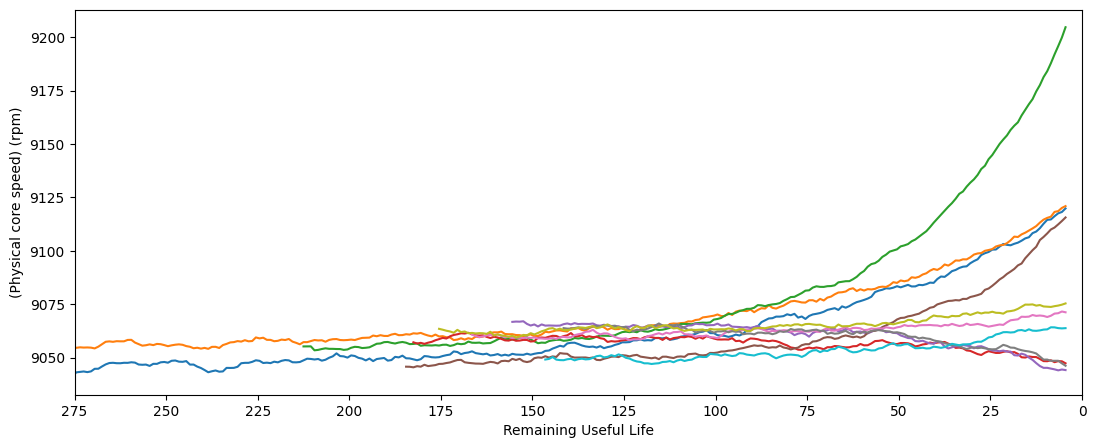

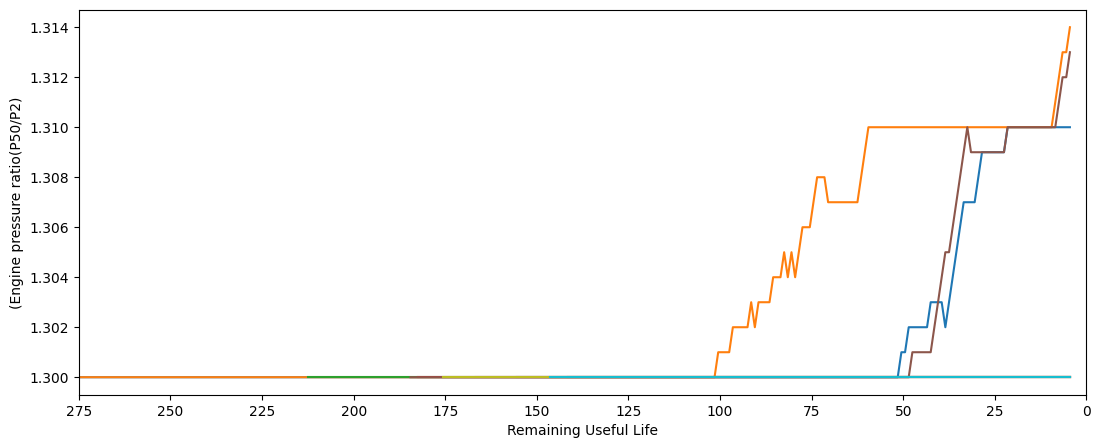

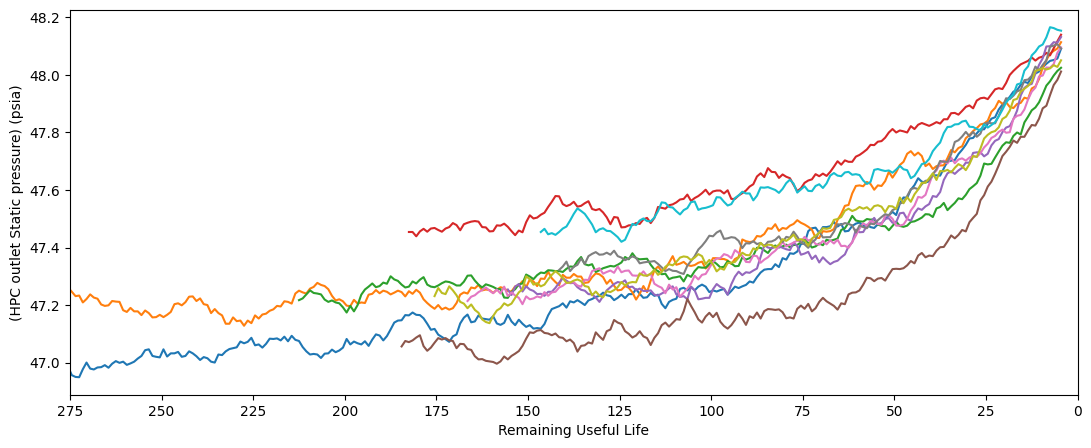

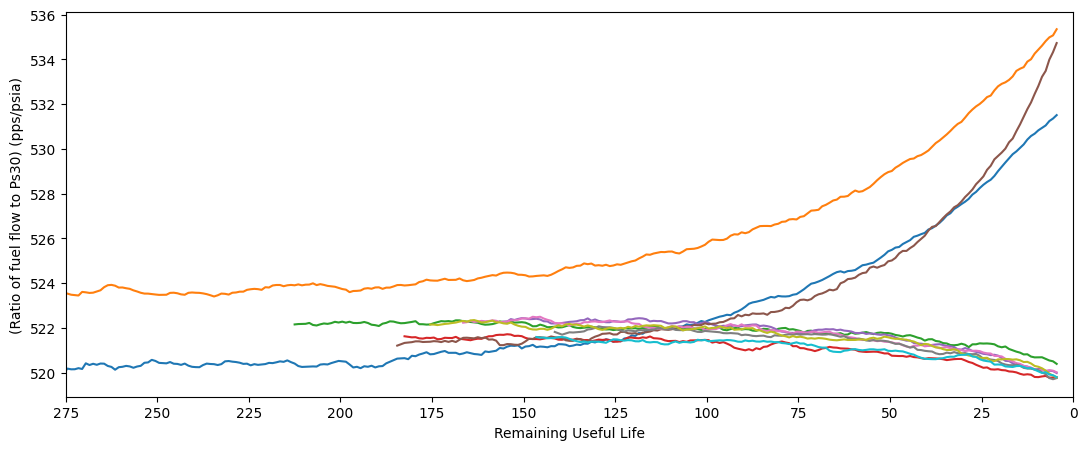

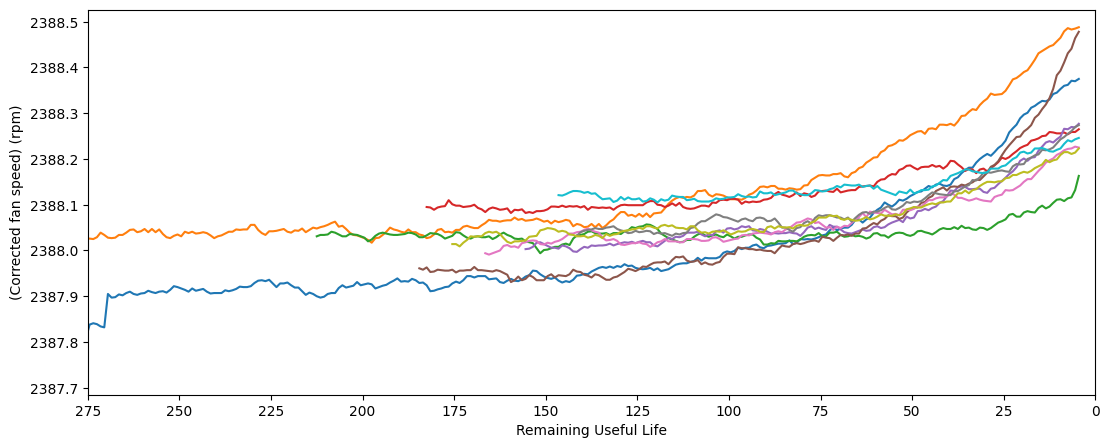

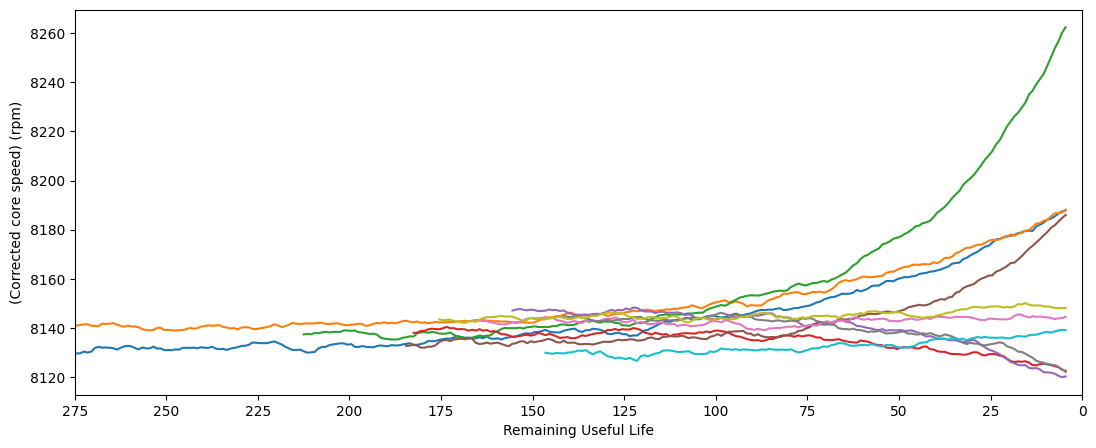

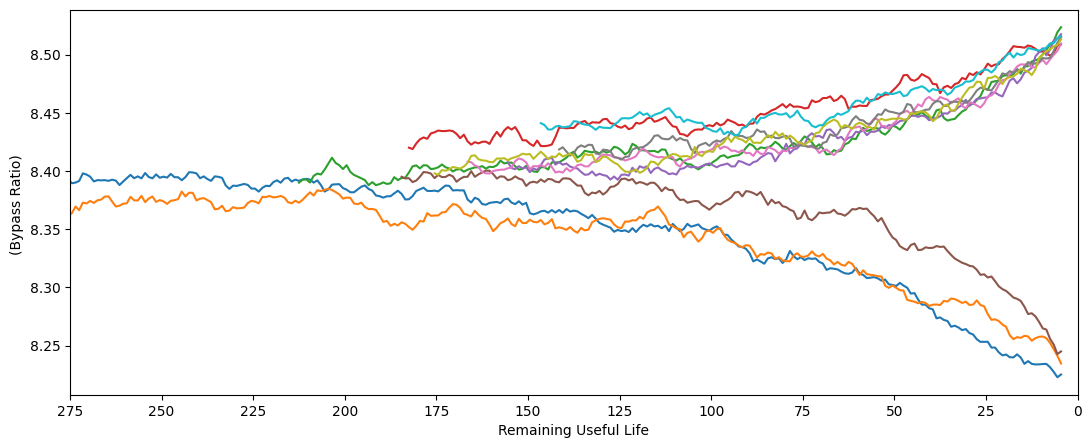

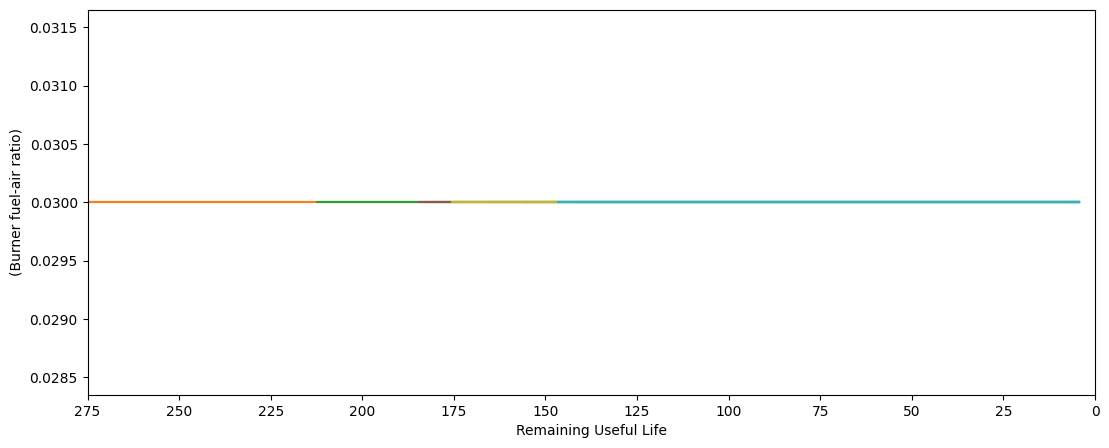

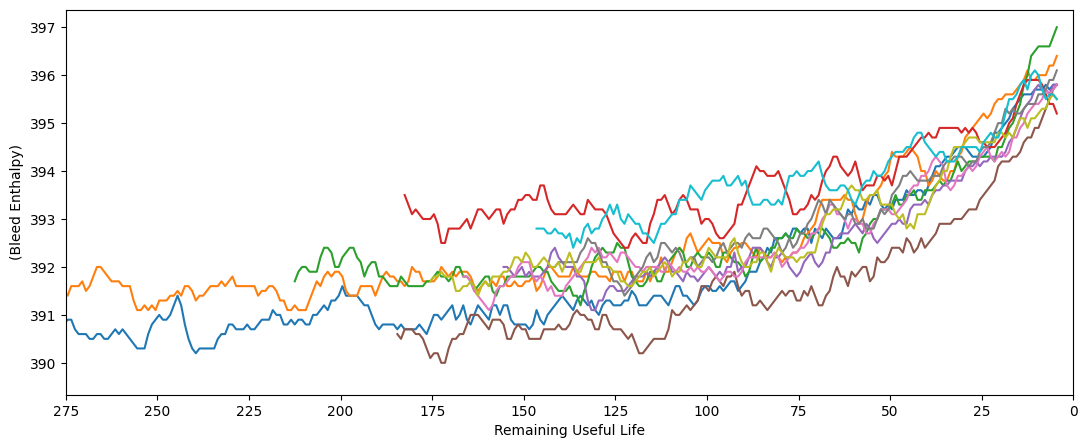

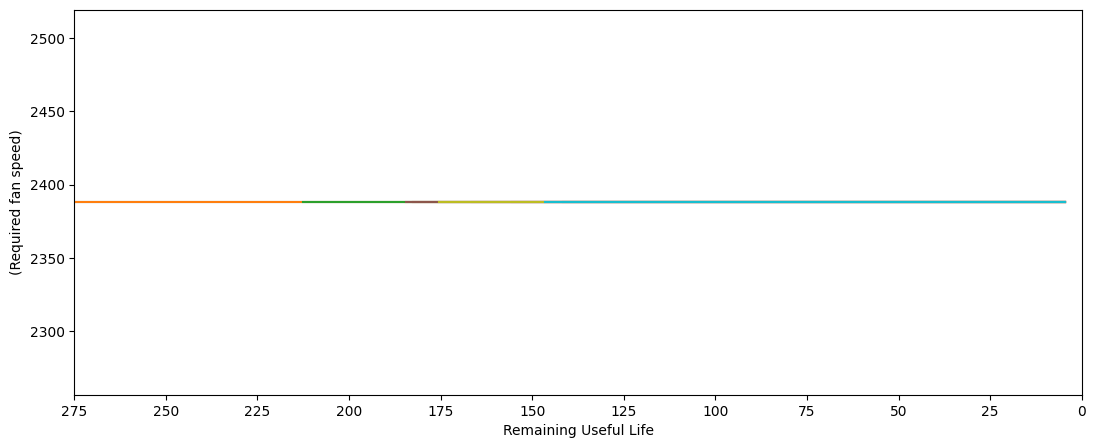

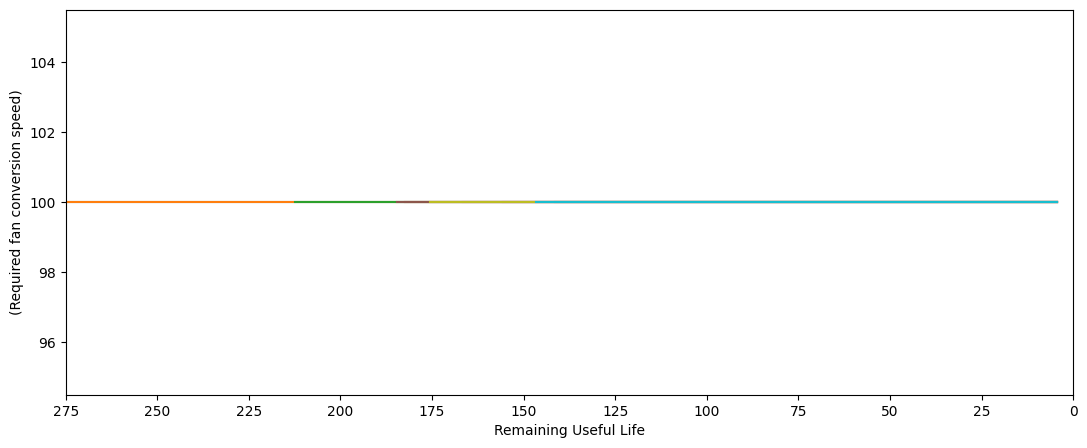

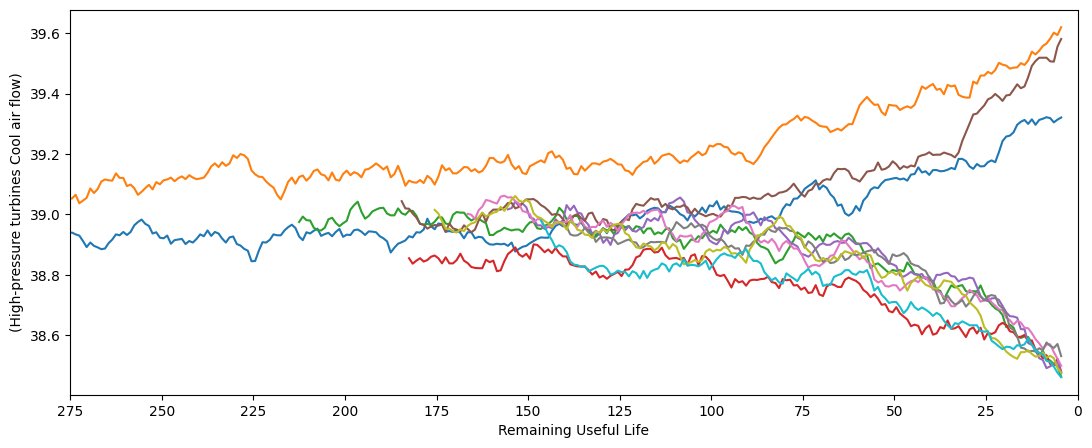

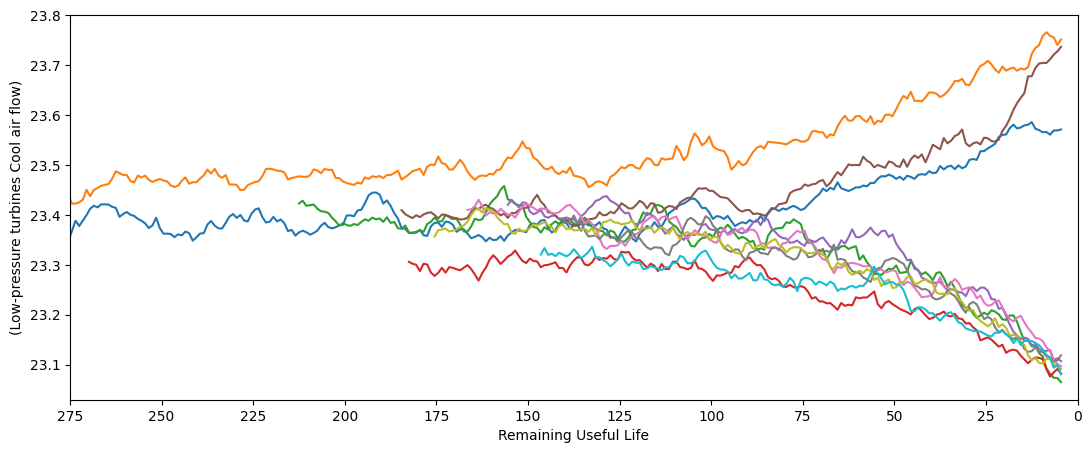

In [ ]:
for i in range(1,22):
    try:
        plot_signal(train, Sensor_dictionary,'s_'+str(i))
    except:
        pass

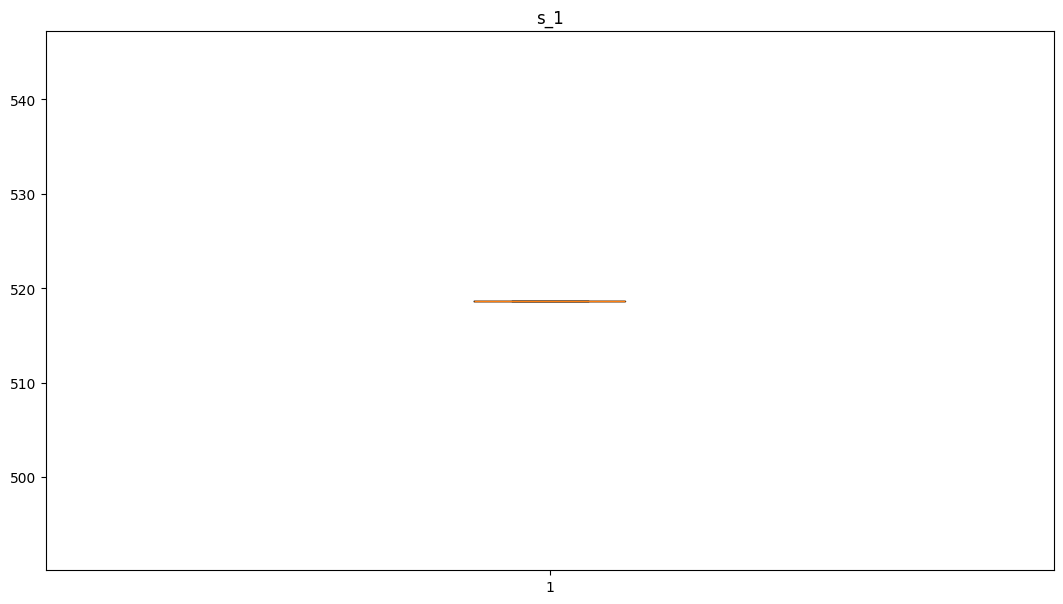

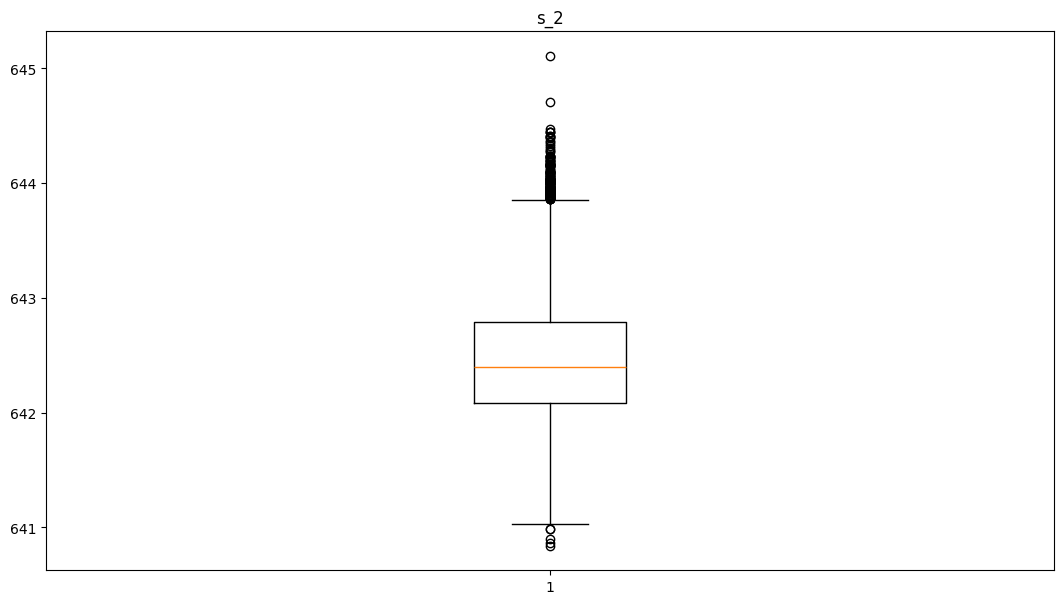

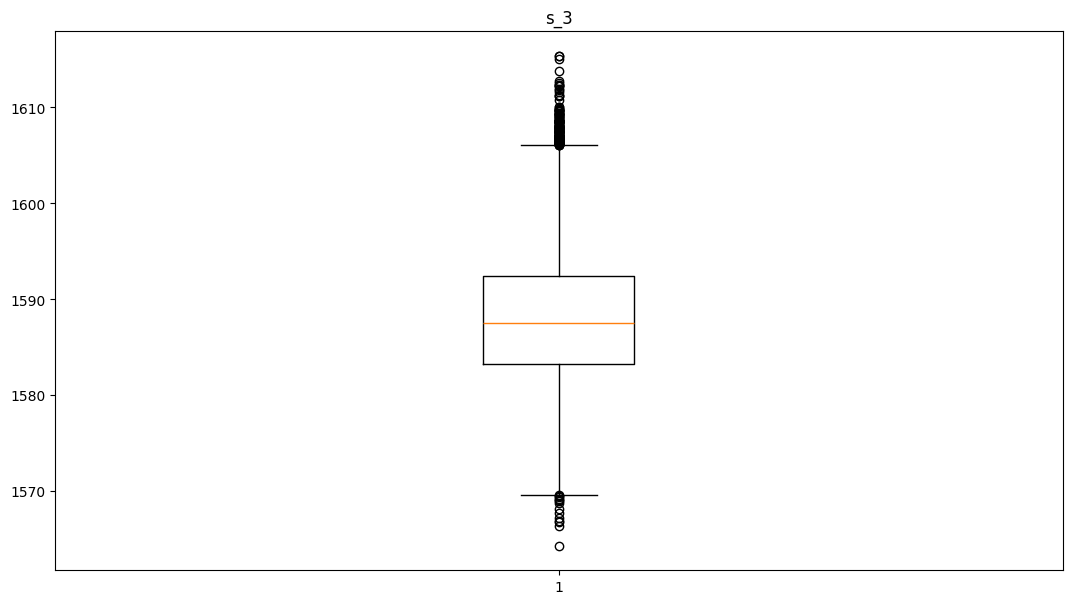

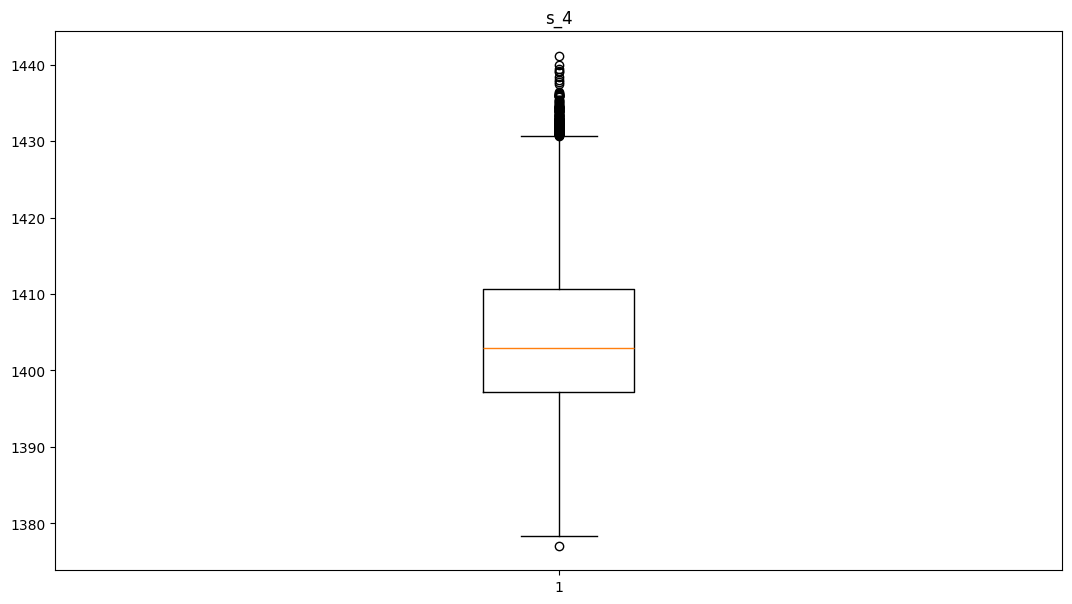

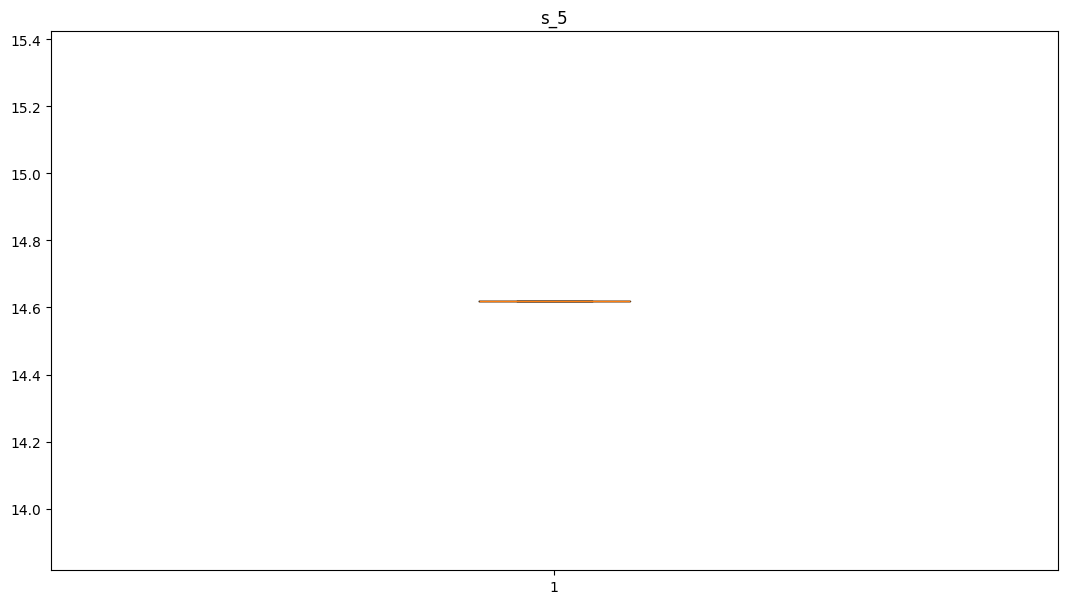

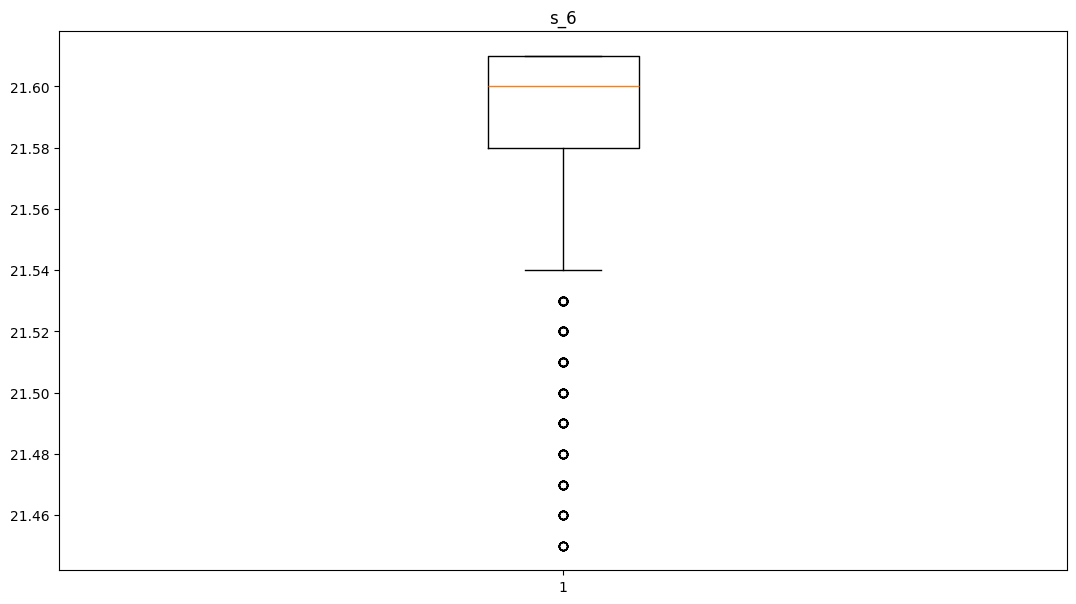

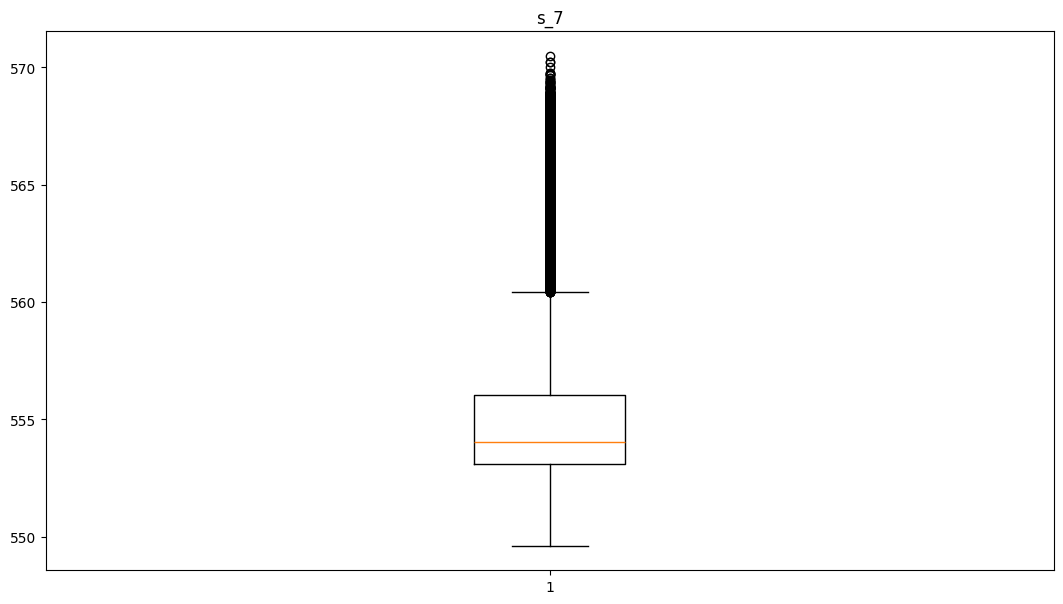

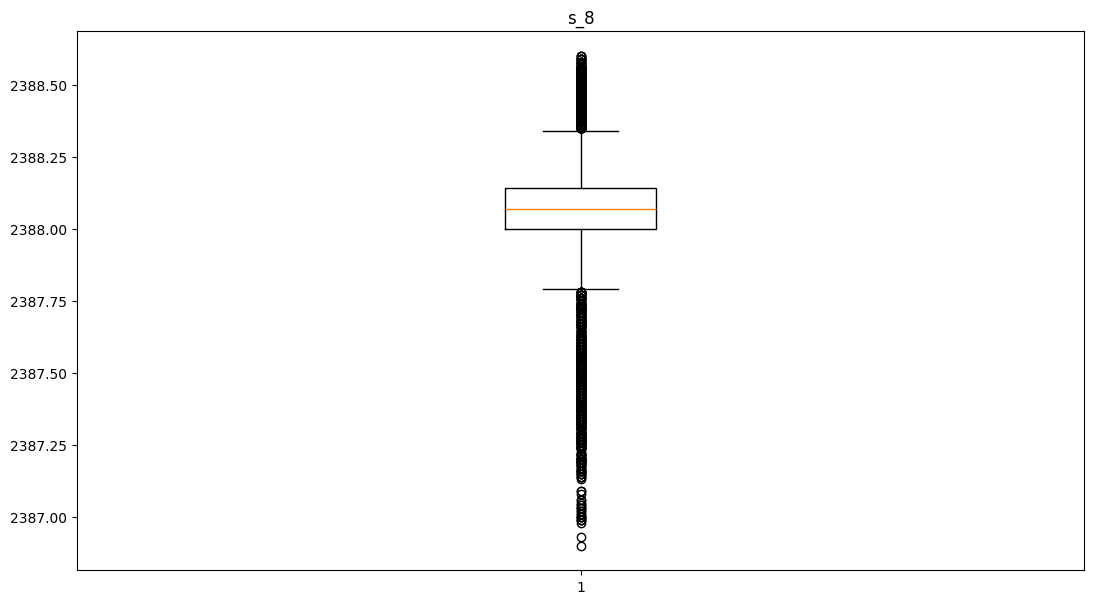

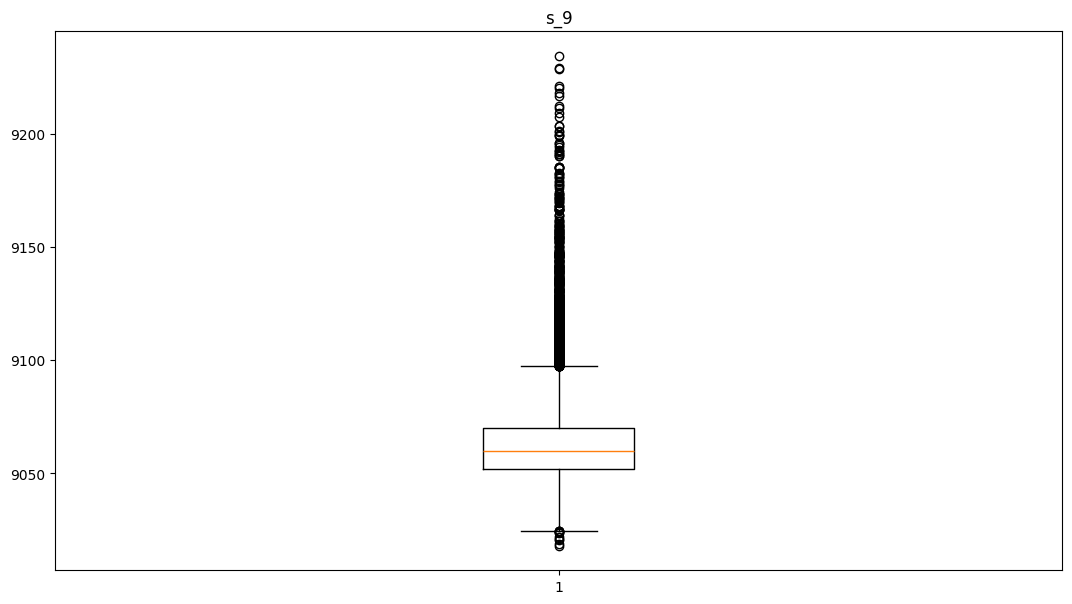

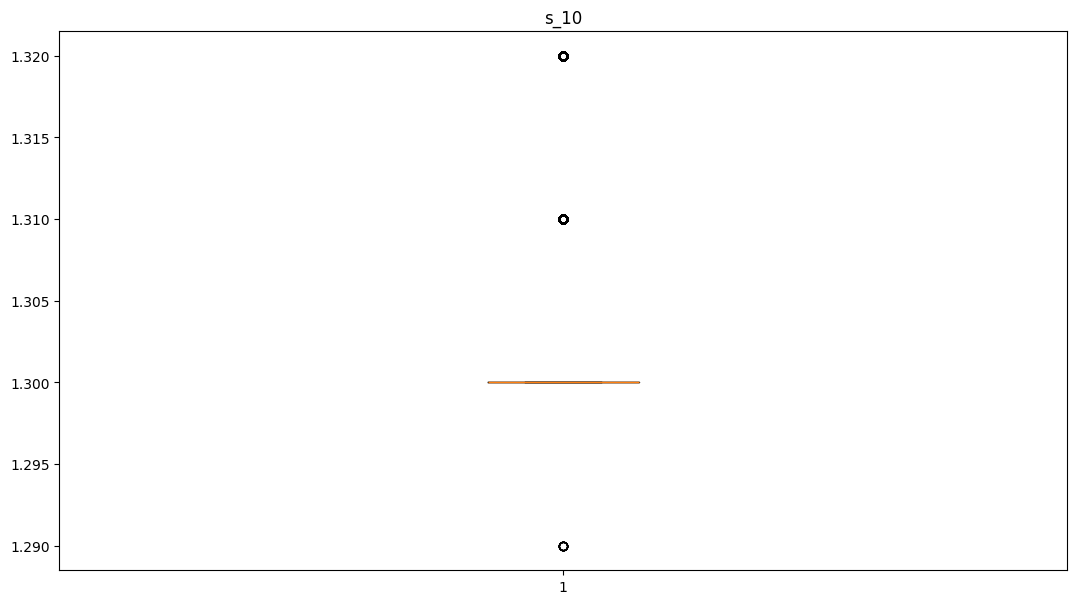

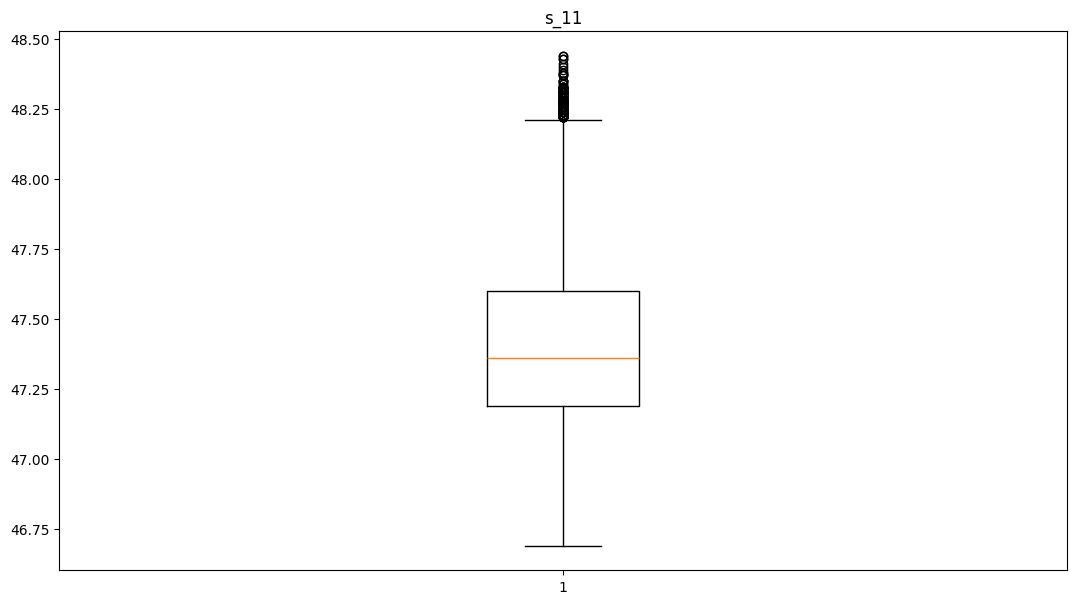

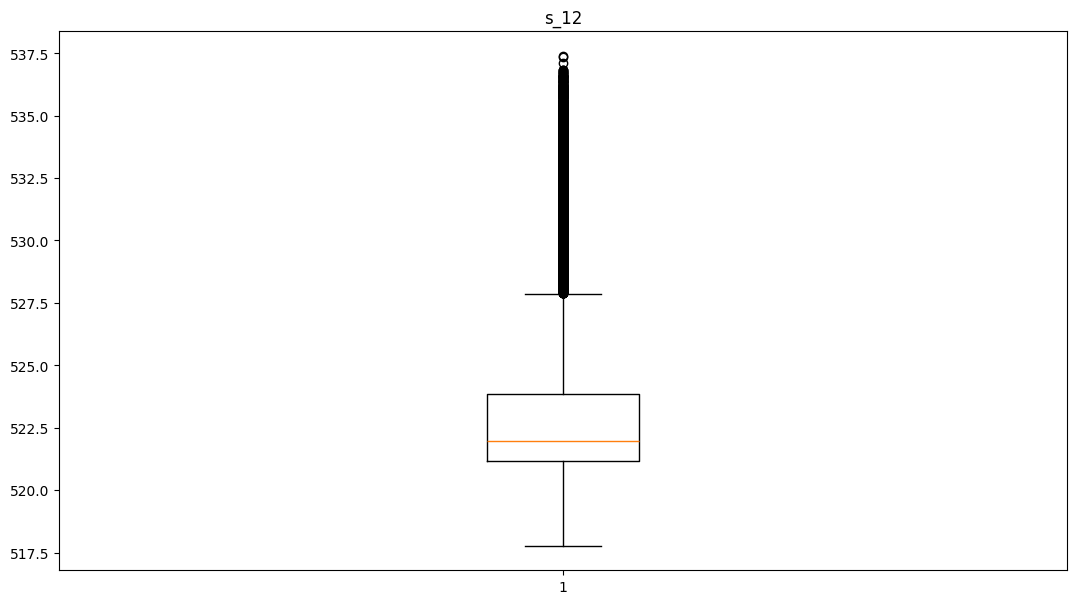

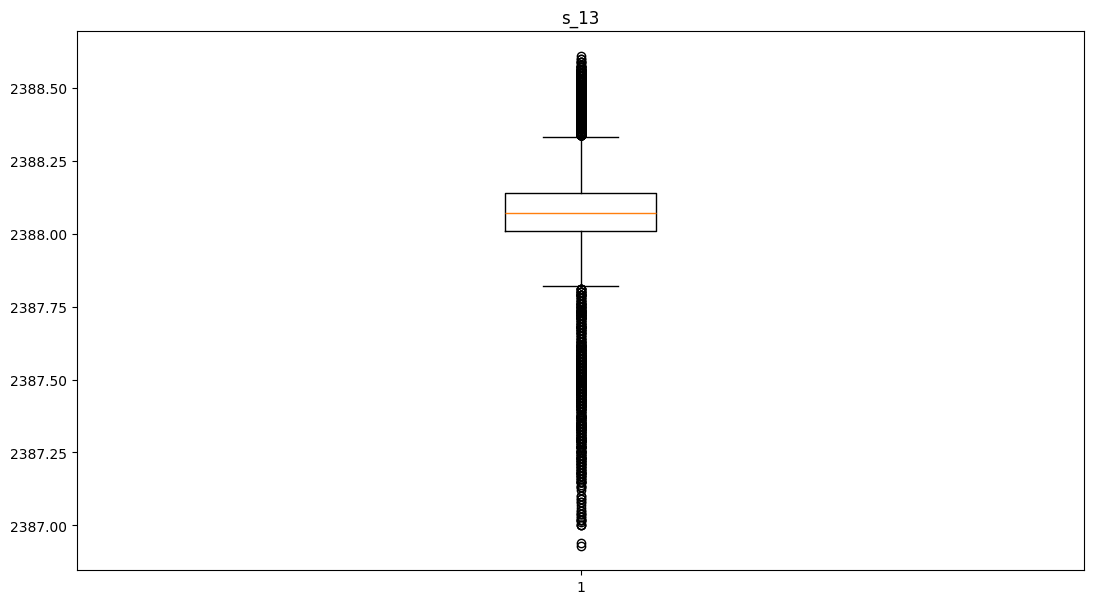

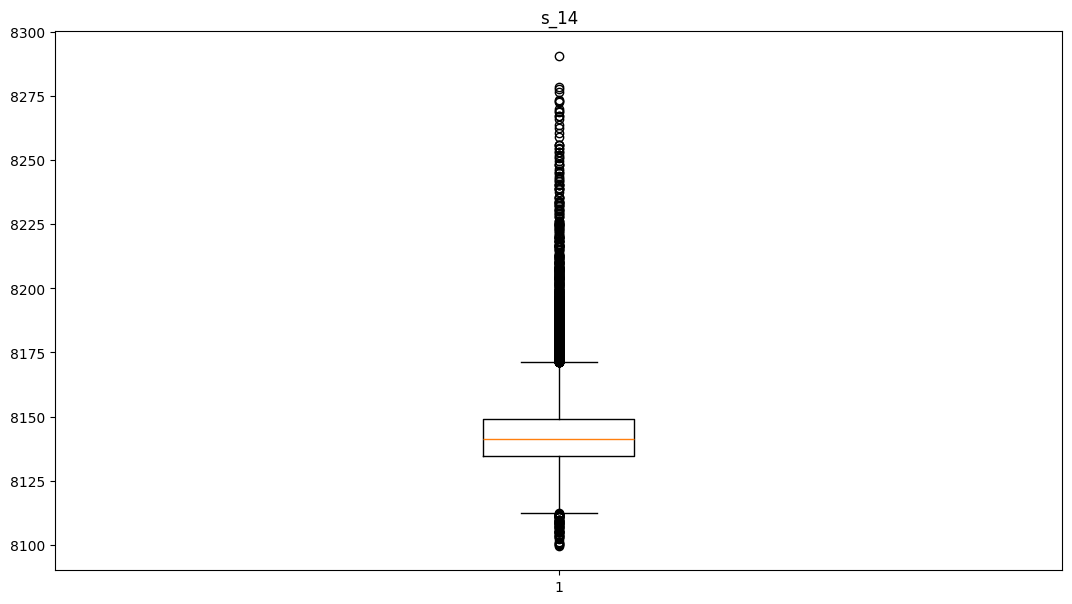

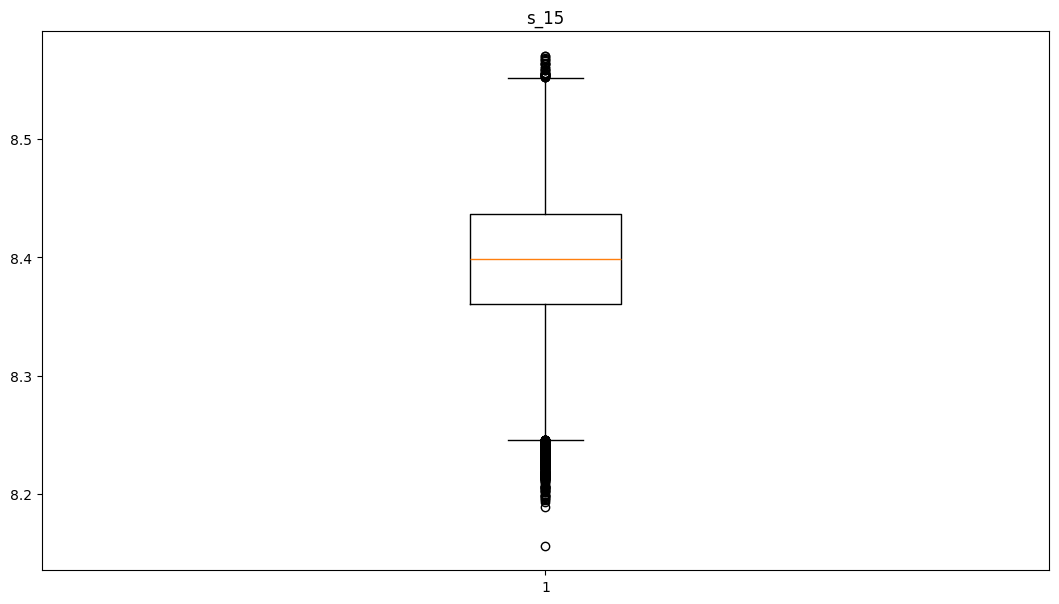

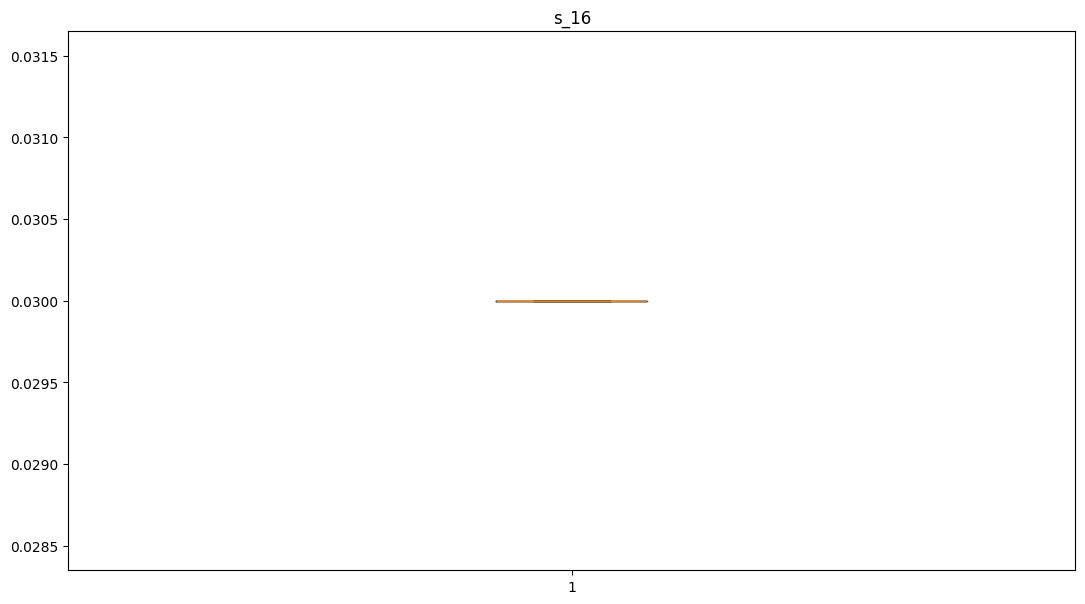

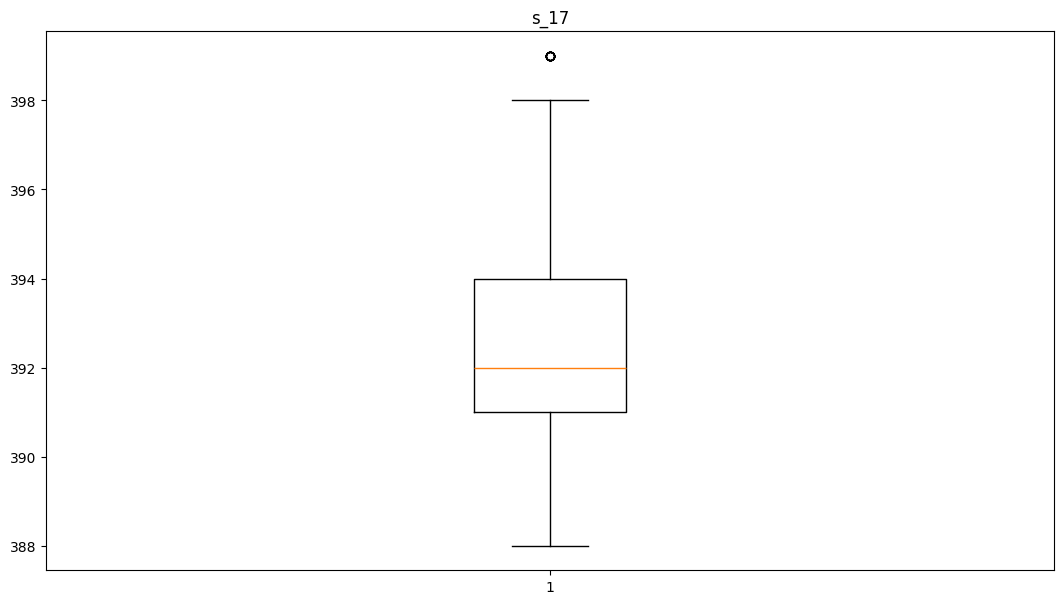

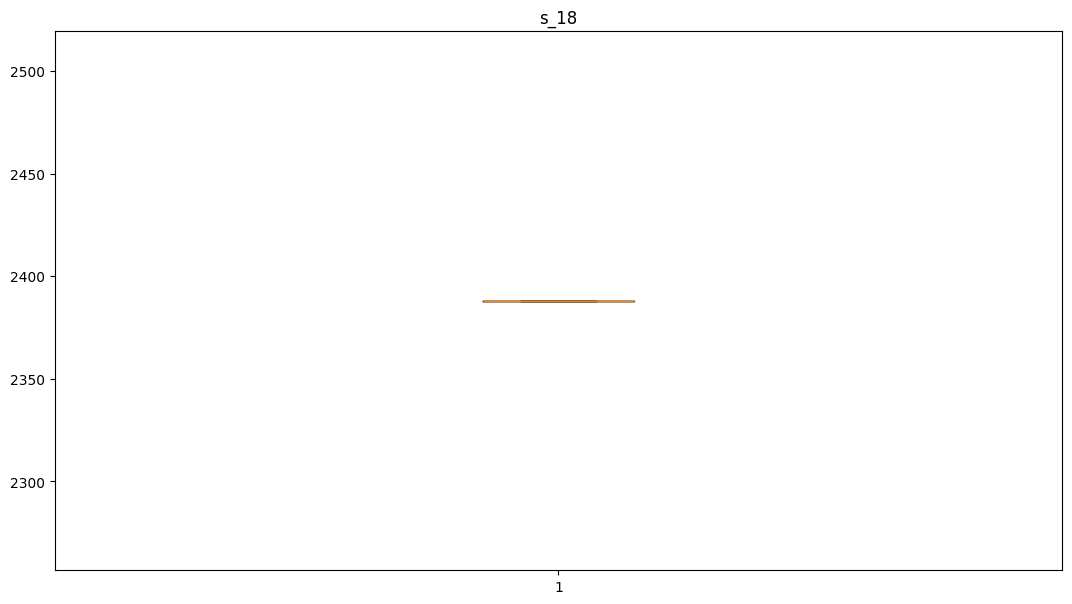

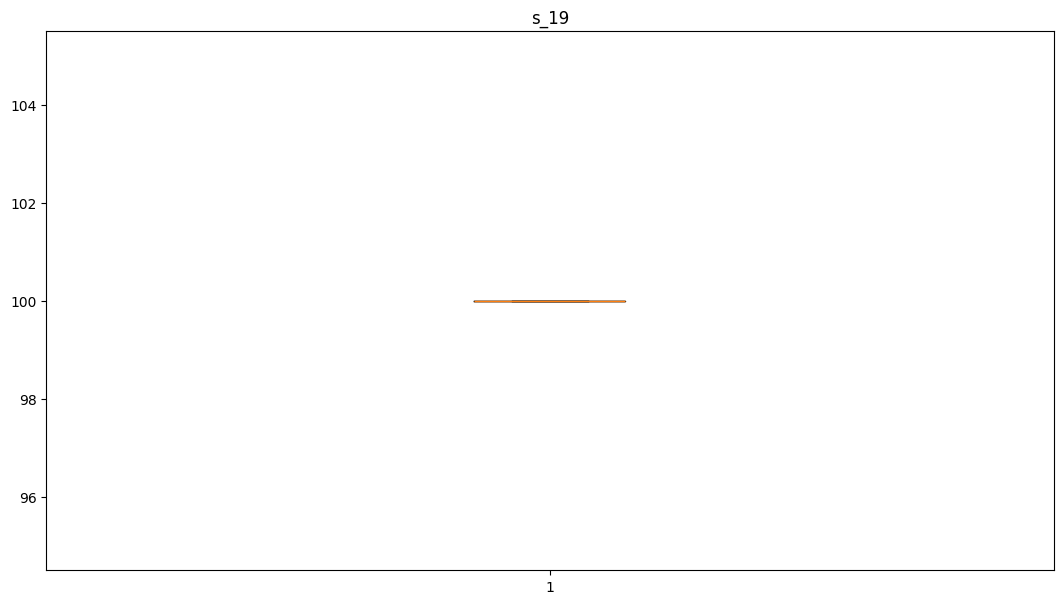

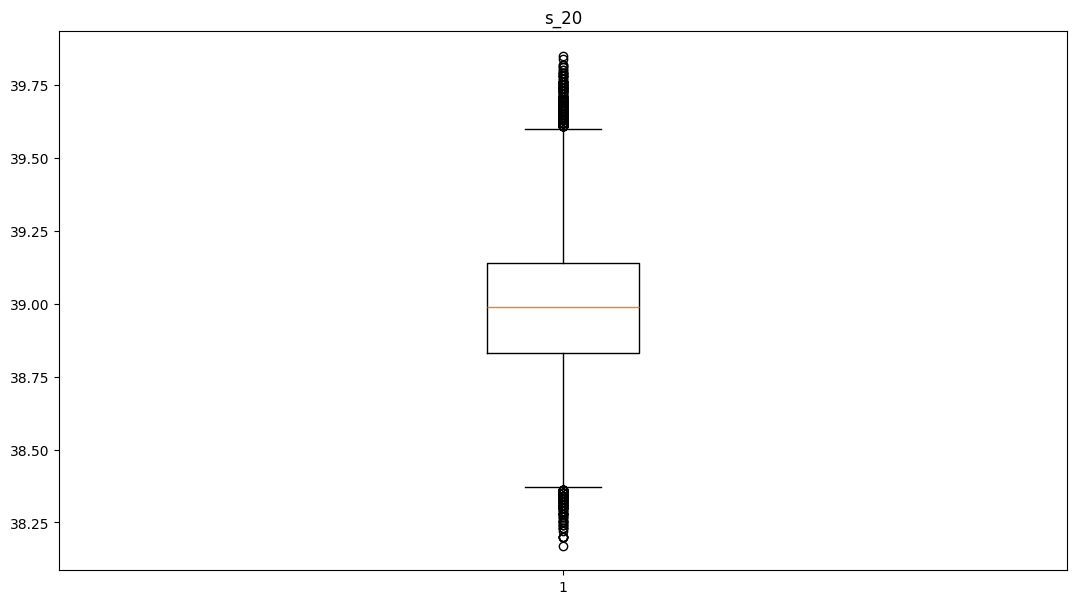

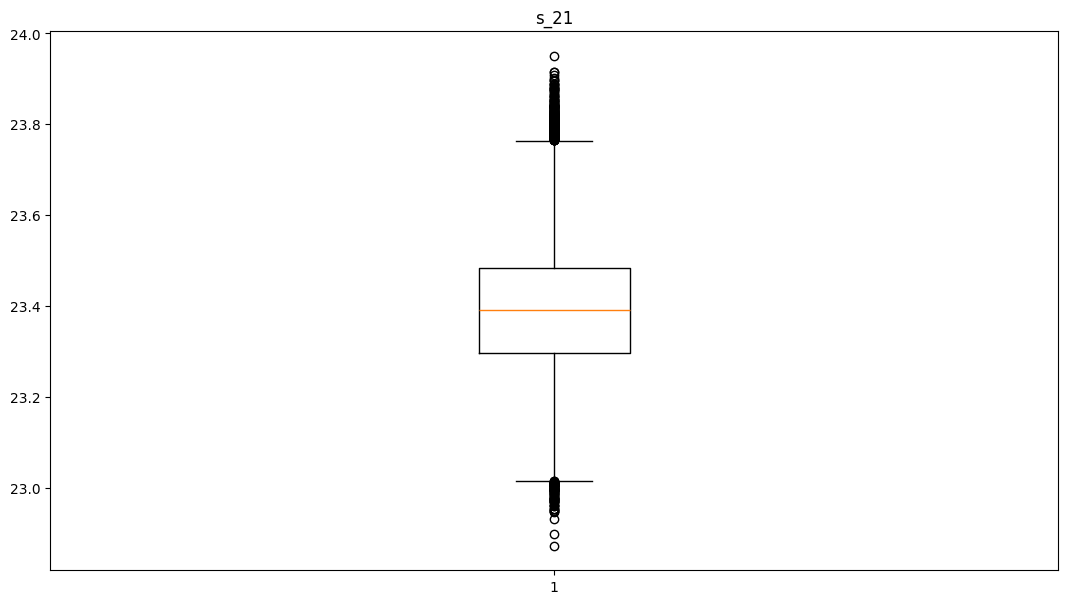

In [ ]:
for x in sensor_names:
    plt.figure(figsize=(13,7))
    plt.boxplot(train[x])
    plt.title(x)
    plt.show()

In [ ]:
train.loc[:,'s_1':].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
s_1,24720.0,518.670000,6.684921e-11,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,24720.0,642.457858,5.230311e-01,640.8400,642.0800,642.4000,642.7900,645.1100
s_3,24720.0,1588.079175,6.810418e+00,1564.3000,1583.2800,1587.5200,1592.4125,1615.3900
s_4,24720.0,1404.471212,9.773178e+00,1377.0600,1397.1875,1402.9100,1410.6000,1441.1600
s_5,24720.0,14.620000,3.602525e-12,14.6200,14.6200,14.6200,14.6200,14.6200
s_6,24720.0,21.595841,1.811600e-02,21.4500,21.5800,21.6000,21.6100,21.6100
s_7,24720.0,555.143808,3.437343e+00,549.6100,553.1100,554.0500,556.0400,570.4900
s_8,24720.0,2388.071555,1.582849e-01,2386.9000,2388.0000,2388.0700,2388.1400,2388.6000
s_9,24720.0,9064.110809,1.998029e+01,9017.9800,9051.9200,9060.0100,9070.0925,9234.3500
s_10,24720.0,1.301232,3.484849e-03,1.2900,1.3000,1.3000,1.3000,1.3200


In [ ]:
from sklearn.model_selection import train_test_split
drop_labels = index_names+setting_names
X_train=train.drop(columns=drop_labels).copy()
X_train, X_test, y_train, y_test=train_test_split(X_train,X_train['RUL'], test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#Droping the target variable
X_train.drop(columns=['RUL'], inplace=True)
X_test.drop(columns=['RUL'], inplace=True)
#Scaling X_train and X_test
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.fit_transform(X_test)
#Conserve only the last occurence of each unit to match the length of y_valid
X_valid = valid.groupby('unit_number').last().reset_index().drop(columns=drop_labels)
#scaling X_valid
X_valid_s=scaler.fit_transform(X_valid)

In [ ]:
print(X_valid_s.shape)
print(y_valid.shape)

(100, 21)
(100, 1)


array([[<Axes: title={'center': 's_1'}>, <Axes: title={'center': 's_2'}>,
        <Axes: title={'center': 's_3'}>, <Axes: title={'center': 's_4'}>,
        <Axes: title={'center': 's_5'}>],
       [<Axes: title={'center': 's_6'}>, <Axes: title={'center': 's_7'}>,
        <Axes: title={'center': 's_8'}>, <Axes: title={'center': 's_9'}>,
        <Axes: title={'center': 's_10'}>],
       [<Axes: title={'center': 's_11'}>,
        <Axes: title={'center': 's_12'}>,
        <Axes: title={'center': 's_13'}>,
        <Axes: title={'center': 's_14'}>,
        <Axes: title={'center': 's_15'}>],
       [<Axes: title={'center': 's_16'}>,
        <Axes: title={'center': 's_17'}>,
        <Axes: title={'center': 's_18'}>,
        <Axes: title={'center': 's_19'}>,
        <Axes: title={'center': 's_20'}>],
       [<Axes: title={'center': 's_21'}>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

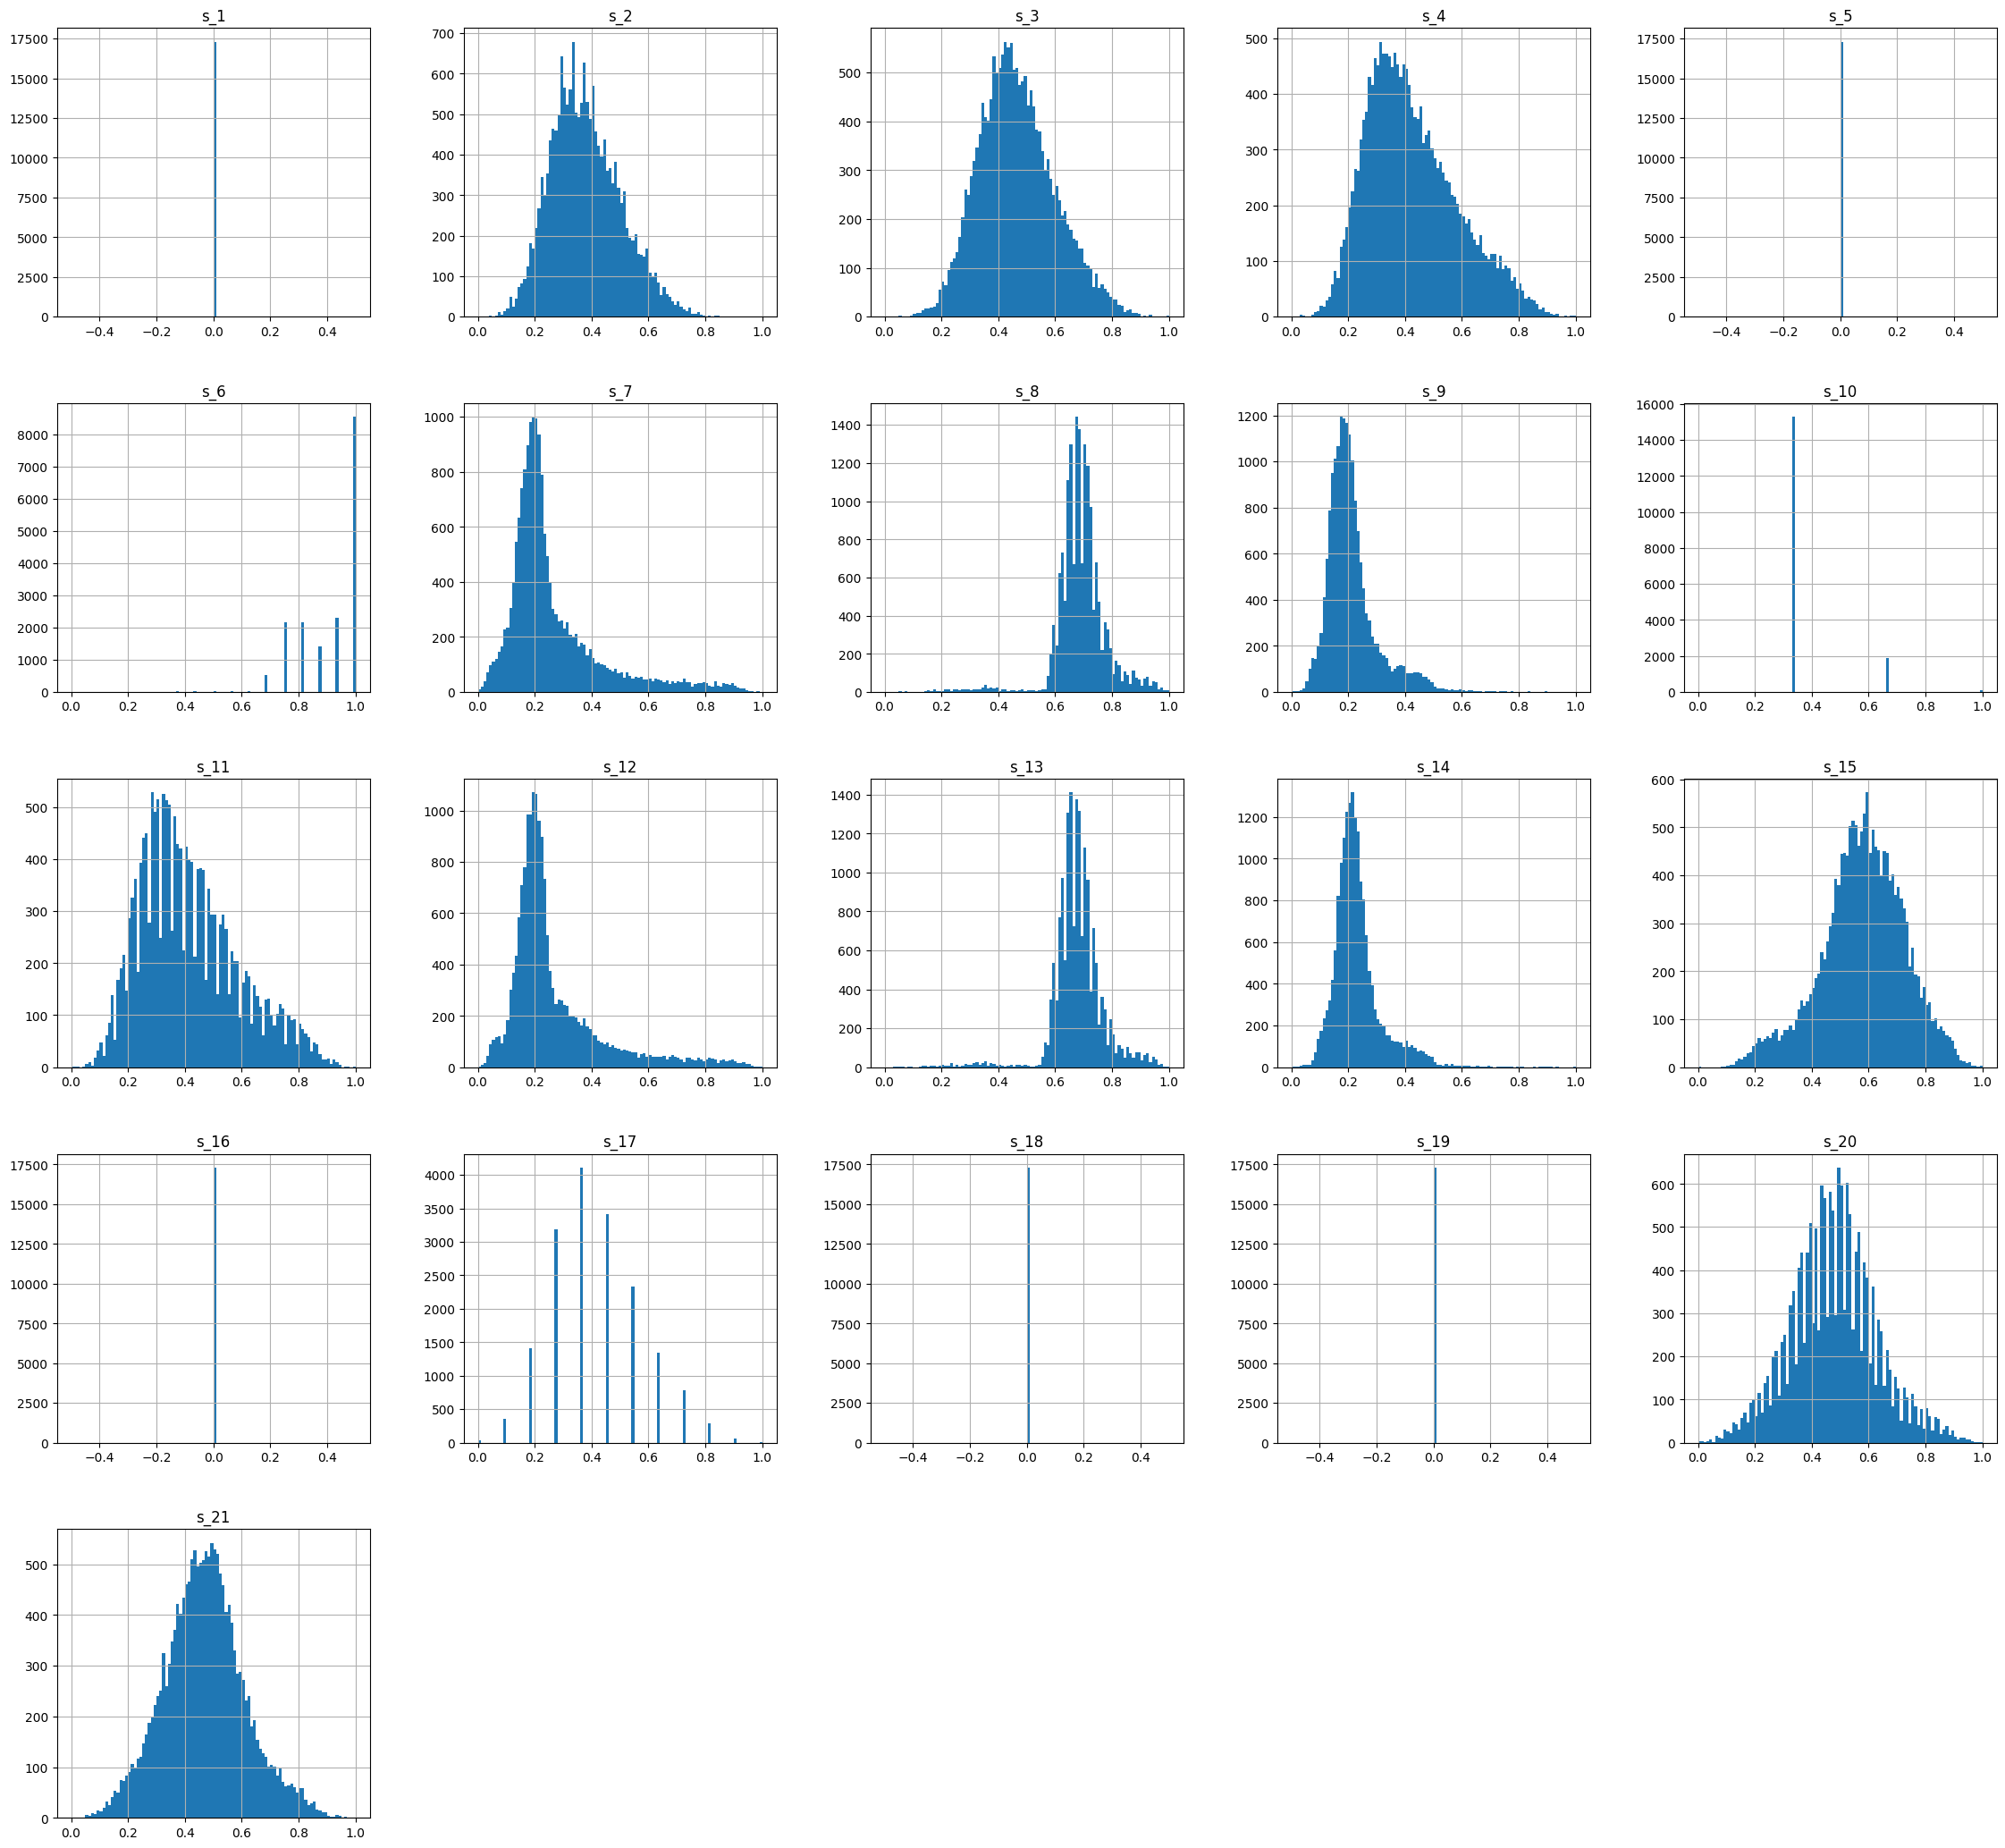

In [ ]:
sensor_names=['s_{}'.format(i) for i in range(1,22)]
pd.DataFrame(X_train_s,columns=['s_{}'.format(i) for i in range(1,22)])[sensor_names].hist(bins=100, figsize=(28,26))

In [ ]:
train['s_10'].unique()

array([1.3 , 1.31, 1.32, 1.29])

In [ ]:
def evaluate(y_true, y_hat, label='test'):
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    variance = r2_score(y_true, y_hat)
    print('{} set RMSE:{}, R2:{}'.format(label, rmse, variance))

In [ ]:
def plot_predActual(y_test, y_test_hat):

    indices = np.arange(len(y_test_hat))
    wth= 0.6
    plt.figure(figsize=(70,30))
    true_values = [int(x) for x in y_test.values]
    predicted_values = list(y_test_hat)

    plt.bar(indices, true_values, width=wth,color='b', label='True RUL')
    plt.bar([i for i in indices], predicted_values, width=0.5*wth, color='r', alpha=0.7, label='Predicted RUL')

    plt.legend(prop={'size': 40})
    plt.tick_params(labelsize=40)

    plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score # Import the required functions

# 3. Hyperparameter tuning (FAST version)
pipe = Pipeline([('model', SVR())])

param_grid = {
    'model__C': [0.1, 1, 10],
    'model__epsilon': [0.01, 0.1],
    'model__kernel': ['rbf']
}

search = RandomizedSearchCV(pipe, param_grid,
                            n_iter=3, cv=2,
                            scoring='neg_mean_absolute_error',
                            random_state=42, n_jobs=-1)

search.fit(X_train_s, y_train)
print("Best params:", search.best_params_)

# 4. Evaluate on all 3 sets
best_svr = search.best_estimator_

y_svr_train = best_svr.predict(X_train_s)
y_svr_test = best_svr.predict(X_test_s)
y_svr_valid = best_svr.predict(X_valid_s)

print("Train metrics:")
score_svr=evaluate(y_train, y_svr_train, label='train')

print("\nTest metrics:")
score_svr_t=evaluate(y_test, y_svr_test, label='test')

print("\nValidation metrics:")
score_svr_v=evaluate(y_valid, y_svr_valid, label='valid')

Best params: {'model__kernel': 'rbf', 'model__epsilon': 0.1, 'model__C': 10}
Train metrics:
train set RMSE:60.22706034019518, R2:0.6280364032350041

Test metrics:
test set RMSE:59.51912157706807, R2:0.638966136750162

Validation metrics:
valid set RMSE:35.87321627970095, R2:0.2490140939446922


In [ ]:
class Linear_Regression() :
    def __init__( self, lr=0.01, iterations=150 ) :
        self.lr = lr
        self.iterations = iterations
    def fit( self, X, Y ) :
        self.l, self.p = X.shape
        # weight initializer
        self.W = np.zeros( self.p )
        self.b = 0
        self.X = X
        self.Y = Y
        # gradientlearning
        for i in range( self.iterations ) :
            self.weight_updater()
        return self

    def weight_updater( self ) :
        Y_pred = self.predict( self.X )
        #  gradients
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.l
        db = - 2 * np.sum( self.Y - Y_pred ) / self.l
        # new weights assigned
        self.b = self.b - self.lr * db
        self.W = self.W - self.lr * dW
        return self

    def predict( self, X ) :
          # Y_pr=X.W+b
        return X.dot( self.W ) + self.b

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression() #Instantiation
lr.fit(X=X_train_s,y=y_train) #Fitting

y_lr_train = lr.predict(X_train_s) #Prediction on train data
evaluate(y_train,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_s)  #Prediction on test data
evaluate(y_test, y_lr_test, label='test')

y_lr_valid= lr.predict(X_valid_s) #Prediction on validation data
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:63.65628783479023, R2:0.5844725447855839
test set RMSE:63.23237344159829, R2:0.5925128860286067
valid set RMSE:78.28302550820028, R2:-2.5762375500044676


In [ ]:
lr=Linear_Regression() #Instantiation
lr.fit(X=X_train_s, Y=y_train) #Fitting

y_lr_train = lr.predict(X_train_s) #Prediction on train data
evaluate(y_train,y_lr_train, label='train')

y_lr_test = lr.predict(X_test_s)  #Prediction on test data
evaluate(y_test, y_lr_test, label='test')

y_lr_valid= lr.predict(X_valid_s) #Prediction on validation data
evaluate(y_valid, y_lr_valid, label='valid')

train set RMSE:97.04527768058038, R2:0.034247322804832336
test set RMSE:97.41702579318216, R2:0.03282592924866379
valid set RMSE:57.232082056309466, R2:-0.9114821452248412


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline


# 2. Create Pipeline (Note: RandomForest doesn't need scaling, but keeping for consistency)
pipe = Pipeline([
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1))
])

# 3. Optimized Parameter Grid (faster but still effective)
param_grid = {
    'model__n_estimators': [50, 100, 200],        # Reduced from [100, 200, 400]
    'model__max_depth': [10, 20, 30],             # Changed None to 30 (faster)
    'model__min_samples_split': [2, 5],           # Reduced from [2, 5, 10]
    'model__min_samples_leaf': [1, 2],            # Added for regularization
    'model__max_features': ['sqrt', 'log2']       # Added for better generalization
}

# 4. Fast Hyperparameter Tuning
search = RandomizedSearchCV(
    pipe,
    param_grid,
    n_iter=5,                                     # Reduced from 6
    cv=2,                                         # Reduced from 3 (faster)
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1,
    verbose=1                                     # Show progress
)

print("Starting hyperparameter tuning...")
search.fit(X_train_s, y_train)

# 5. Get best model
print("\nBest RandomForest params:", search.best_params_)
print(f"Best CV Score (MAE): {-search.best_score_:.4f}")

best_rf = search.best_estimator_

# 6. Comprehensive Evaluation on All 3 Sets
print("\n" + "="*60)
print("RANDOM FOREST - PERFORMANCE EVALUATION")
print("="*60)

# Train set
y_rf_train = best_rf.predict(X_train_s)
print("\n TRAIN SET:")
evaluate(y_train, y_rf_train, label='train')

# Test set
y_rf_test = best_rf.predict(X_test_s)
print("\n TEST SET:")
evaluate(y_test, y_rf_test, label='test')

# Validation set
y_rf_valid = best_rf.predict(X_valid_s)
print("\n VALIDATION SET:")
evaluate(y_valid, y_rf_valid, label='valid')






Starting hyperparameter tuning...
Fitting 2 folds for each of 5 candidates, totalling 10 fits

Best RandomForest params: {'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'log2', 'model__max_depth': 30}
Best CV Score (MAE): 39.1789

RANDOM FOREST - PERFORMANCE EVALUATION

 TRAIN SET:
train set RMSE:21.009578172199284, R2:0.9547361206797704

 TEST SET:
test set RMSE:56.10619181880595, R2:0.6791836474111661

 VALIDATION SET:
valid set RMSE:37.55011168841578, R2:0.17716336214960893


In [ ]:
# ============================================================================
# XGBOOST
# ============================================================================
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Create Pipeline
xgb_pipe = Pipeline([
    ('model', XGBRegressor(random_state=42, n_jobs=-1))
])

# Parameter Grid
xgb_param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.3],
    'model__subsample': [0.7, 0.8, 1.0],
    'model__colsample_bytree': [0.7, 0.8, 1.0],
    'model__min_child_weight': [1, 3, 5]
}

# Hyperparameter Tuning
xgb_search = RandomizedSearchCV(
    xgb_pipe,
    xgb_param_grid,
    n_iter=10,
    cv=2,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Starting hyperparameter tuning...")
xgb_search.fit(X_train_s, y_train)

# Get best model
print("\nBest XGBoost params:", xgb_search.best_params_)
print(f"Best CV Score (MAE): {-xgb_search.best_score_:.4f}")

best_xgb = xgb_search.best_estimator_

# Comprehensive Evaluation on All 3 Sets
print("\n" + "="*60)
print("XGBOOST - PERFORMANCE EVALUATION")
print("="*60)

# Train set
y_xgb_train = best_xgb.predict(X_train_s)
print("\n TRAIN SET:")
evaluate(y_train, y_xgb_train, label='train')

# Test set
y_xgb_test = best_xgb.predict(X_test_s)
print("\n TEST SET:")
evaluate(y_test, y_xgb_test, label='test')

# Validation set
y_xgb_valid = best_xgb.predict(X_valid_s)
print("\n VALIDATION SET:")
evaluate(y_valid, y_xgb_valid, label='valid')

Starting hyperparameter tuning...
Fitting 2 folds for each of 10 candidates, totalling 20 fits

Best XGBoost params: {'model__subsample': 0.8, 'model__n_estimators': 100, 'model__min_child_weight': 3, 'model__max_depth': 7, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.7}
Best CV Score (MAE): 39.3028

XGBOOST - PERFORMANCE EVALUATION

 TRAIN SET:
train set RMSE:41.23720504687636, R2:0.8256204724311829

 TEST SET:
test set RMSE:56.49031564541616, R2:0.6747757196426392

 VALIDATION SET:
valid set RMSE:33.243159687605285, R2:0.3550950288772583


In [ ]:
# ============================================================================
# ADABOOST
# ============================================================================
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

# Create Pipeline
ada_pipe = Pipeline([
    ('model', AdaBoostRegressor(random_state=42))
])

# Parameter Grid
ada_param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.5, 1.0],
    'model__loss': ['linear', 'square', 'exponential']
}

# Hyperparameter Tuning
ada_search = RandomizedSearchCV(
    ada_pipe,
    ada_param_grid,
    n_iter=8,
    cv=2,
    scoring='neg_mean_absolute_error',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Starting hyperparameter tuning...")
ada_search.fit(X_train_s, y_train)

# Get best model
print("\nBest AdaBoost params:", ada_search.best_params_)
print(f"Best CV Score (MAE): {-ada_search.best_score_:.4f}")

best_ada = ada_search.best_estimator_

# Comprehensive Evaluation on All 3 Sets
print("\n" + "="*60)
print("ADABOOST - PERFORMANCE EVALUATION")
print("="*60)

# Train set
y_ada_train = best_ada.predict(X_train_s)
print("\n TRAIN SET:")
evaluate(y_train, y_ada_train, label='train')

# Test set
y_ada_test = best_ada.predict(X_test_s)
print("\n TEST SET:")
evaluate(y_test, y_ada_test, label='test')

# Validation set
y_ada_valid = best_ada.predict(X_valid_s)
print("\n VALIDATION SET:")
evaluate(y_valid, y_ada_valid, label='valid')

Starting hyperparameter tuning...
Fitting 2 folds for each of 8 candidates, totalling 16 fits

Best AdaBoost params: {'model__n_estimators': 100, 'model__loss': 'exponential', 'model__learning_rate': 0.1}
Best CV Score (MAE): 47.6146

ADABOOST - PERFORMANCE EVALUATION

 TRAIN SET:
train set RMSE:62.3109605801828, R2:0.6018506607151982

 TEST SET:
test set RMSE:63.20289394824273, R2:0.5928927456747002

 VALIDATION SET:
valid set RMSE:46.48434360427448, R2:-0.26096943665201966
